1. Load the Data and Feature Engineering

In [1]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - ----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [2]:
data = pd.read_csv('Sample - Superstore.csv',encoding='ISO-8859-1')

pd.set_option('display.max_columns',22)

data.head(7)

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
5  Brosina Hoffman   Consumer  United States      Los Angeles  California   
6  Brosina Hoffman   Consumer  United States      Los Angeles  California   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   
5        90032   West  FUR-FU-10001487        Furniture  Furnishings   
6        90032   West  OFF-AR-10002833  Office Supplies          Art   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   
5  Eldon Expressions Wood and Plastic Desk Access...   48.8600         7   
6                                         Newell 322    7.2800         4   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  
5      0.00   14.1694  
6      0.00    1.9656

**Columns and their meaning (whenever it is not obvious)**

1. **Row ID.** This is just the row number.
2. **Order ID.**
3. **Order Date.**
4. **Ship Date.**
5. **Ship Mode.** Shipping (or delivery) category: first class, second class ...
6. **Customer ID.**
7. **Customer Name.**
8. **Segment.** Type of customer/client: consumer, corporate or home office.
9. **Country.** Customer's country.
10. **City.** Customer's city.
11. **State.** Customer's state.
12. **Postal Code.**
13. **Region.**
14. **Product ID.**
15. **Category.** Shipped product category: furniture, office supplies or technology.
16. **Sub-Category.** Product sub-category: bookcases, chairs, labels, tables, and so on.
17. **Product Name.**
18. **Sales.** Total price of the products sold.
19. **Quantity.** Quantity of items sold.
20. **Discount.** It is a float between 0 and 1 and it represents the discount rate applied to the specific order.
21. **Profit.** Superstore profit for this particular order.

Some columns (like *Row ID*) might be useless for our purpose. Some of them might be redundant (like *Customer ID* and *Customer Name*, that provide the same information). Later we will decide whether to drop some of them.

In [3]:
print('The dataset has {} rows and {} columns.'.format(data.shape[0],data.shape[1]))

The dataset has 9994 rows and 21 columns.


### 1.1 Null and Duplicate Values; Basic Statistics

In [4]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no null values in the dataset.

In [5]:
print('There are {} duplicate values out of {}.'.format(data.duplicated().sum(),
      data.shape[0]))

There are 0 duplicate values out of 9994.


I am also having a look at the column data types.

In [6]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

The majority of columns are of object (or string) type. At least two of them (*Order Date* and *Ship Date*) may have to be converted into date type. <br>
There are also columns whose values are numeric, like *Sales* and *Quantity* and *Discount* and *Profit*.

Finally, let's have a look at the basic statistics on our data, starting from the numerical features ...

As we Do not need the *Row id* for Our analysis we are dropping that column  from our dataframe

In [7]:
data.drop(["Row ID"],axis=1,inplace=True)

In [8]:
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

* The *Postal Code* column statistic info is not that important.
* The *Sales* have an average value of around 230$\$$, with a standard deviation of around 623$\$$. This tells us that the sales distribution is quite spread. The maximum sale amounts is around 23K, the minimum to less than 1$\$$.
* *Quantity* (the quantity of items sold for a single purchase) has a mean of 3.8 and a standard deviation of 2.2. The min and max values are 1 and 14, respectively.
* *Discount* ranges between 0% and 80%, with an average of almost 16%.

* The *Profit* ranges from -6.6K to 8.4K. A negative profit value is suspect and needs to be investigated.




... and then moving to the stats on the categorical ones.

In [9]:
data.describe(include="object").T

count unique              top  freq
Order ID       9994   5009   CA-2017-100111    14
Order Date     9994   1237         9/5/2016    38
Ship Date      9994   1334       12/16/2015    35
Ship Mode      9994      4   Standard Class  5968
Customer ID    9994    793         WB-21850    37
Customer Name  9994    793    William Brown    37
Segment        9994      3         Consumer  5191
Country        9994      1    United States  9994
City           9994    531    New York City   915
State          9994     49       California  2001
Region         9994      4             West  3203
Product ID     9994   1862  OFF-PA-10001970    19
Category       9994      3  Office Supplies  6026
Sub-Category   9994     17          Binders  1523
Product Name   9994   1850  Staple envelope    48


- It is worth to note that SUPERSTORE ships in the USA only, So it is not that much worthy to have that column in the data because it is not giving anymore useful info about the data. The state, city and region with more customers are California, New York and the West, respectively.Mostly The Ship mode is Standard Class and Also mostly the Office supplies were sold. It will be interesting to find out what is the fraction of customers living on the coasts vs those from the south and the Midwest.

1.2 Feature Engineering on (Order and Shipping) Dates

I am converting dates from string to datetime format.

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'],format='mixed')
data['Ship Date']  = pd.to_datetime(data['Ship Date'],format='mixed')

Let's have a look at the new data type of the date columns ...

In [11]:
print(data['Order Date'].dtype,' / ',data['Ship Date'].dtype)

datetime64[ns]  /  datetime64[ns]


In [12]:
data['Ship Date'][0] - data['Order Date'][0]

Timedelta('3 days 00:00:00')

In [13]:
(data['Order Date'].max()-data['Order Date'].min())

Timedelta('1457 days 00:00:00')

By subtracting shipping and order dates we can get the interval between the order of a product and its arrival at the customer's home.

It can also be useful to extract more time features from these columns, like the day, month and year when the purchase took place.

In [14]:
# Add new columns year, month and day
data["year"]  = data["Order Date"].dt.year
data["month"] = data["Order Date"].dt.month_name()
data["day"]   = data["Order Date"].dt.day_name()

data[["year","month","day"]].head()

year     month      day
0  2016  November  Tuesday
1  2016  November  Tuesday
2  2016      June   Sunday
3  2015   October   Sunday
4  2015   October   Sunday

1.3 Drop Some Columns

Let's find out if the total numbers of Customer IDs and Customer Names coincide.

In [15]:
data['Customer ID'].nunique(), data['Customer Name'].nunique()

(793, 793)

Yes, the numbers coincide. This means that there is a 1 to 1 correspondence between the *Customer ID*s and the *Customer Name*s and therefore one of these features is redundant and can be dropped. <br>I am dropping the *Customer Name*s because (in the real world) it is illegal to share the customers' personal information online

Let's also find out whether the total number of postal codes coincides with that of the cities. If not, this means that a city can have more than one postal code.

In [16]:
data['Postal Code'].nunique(), data['City'].nunique()

(631, 531)

<p>The number of postal codes is larger than that of the cities, which means that <strong>larger cities can have more than one postal code.</strong> However, this feature is not expected to be very useful, and also The Country columnn is not that much useful thus I am dropping it from the dataframe.</p>

In [17]:
data.drop(columns=['Customer Name','Postal Code'],axis=1,inplace=True)

In [18]:
data['Country'].unique()

array(['United States'], dtype=object)

<p>There is only one country, the Usa: therefore the Country column can be dropped because it does not provide useful information.</p>

In [19]:
data.drop('Country',axis=1,inplace=True)

The last check is to see whether there is correspondence between the product names and their IDs. If the data were collected properly, there should be a 1 to 1 correspondence between them.

In [20]:
data['Product ID'].nunique(), data['Product Name'].nunique(), \
      (data['Product ID'].nunique() - data['Product Name'].nunique()) / data['Product Name'].nunique() * 100

(1862, 1850, 0.6486486486486486)

The difference between the number of these features is less than 1%. Therefore, for the sake of simplicity I am dropping one of the two columns (*Product ID*).

In [21]:
data.drop('Product ID',axis=1,inplace=True)

In [22]:

pd.set_option('display.max_columns',22)
data.head(5)

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Segment             City       State Region         Category  \
0   Consumer        Henderson    Kentucky  South        Furniture   
1   Consumer        Henderson    Kentucky  South        Furniture   
2  Corporate      Los Angeles  California   West  Office Supplies   
3   Consumer  Fort Lauderdale     Florida  South        Furniture   
4   Consumer  Fort Lauderdale     Florida  South  Office Supplies   

  Sub-Category                                       Product Name     Sales  \
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400   
2       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200   
3       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775   
4      Storage                     Eldon Fold 'N Roll Cart System   22.3680   

   Quantity  Discount    Profit  year     month      day  
0         2      0.00   41.9136  2016  November  Tuesday  
1         3      0.00  219.5820  2016  November  Tuesday  
2         2      0.00    6.8714  2016      June   Sunday  
3         5      0.45 -383.0310  2015   October   Sunday  
4         2      0.20    2.5164  2015   October   Sunday

**2. Exploratory Data Analysis**

In [23]:
data['Quantity'].sum()#total items sold in 1422 days 

37873

<h1>2.1 Orders and Items Sold by Area</h1>




First, I am having a look at the number of orders by area. By order I mean a single (and unique) entry in the dataset. More precisely, a unique value in the *Order ID* column. One can notice that the first and the second rows in the *data.head()* output above correspond to the same order (CA-2016-152156), while the third row (CA-2016-138688) is a different order.<br>
Clearly, all the orders are different. Different products were purchased on a single order and, most important, they were purchased in different quantities (see the column *Quantity*).
I will define the number of products purchased as *Items sold*

In [24]:
print('The total number of orders is {}.'.format(data['Order ID'].nunique()))

The total number of orders is 5009.


**Total No. of Orders by State**

In [25]:
orders_by_state=data.groupby('State')['Order ID'].nunique().reset_index(name="Num of Orders").sort_values(by=["Num of Orders"],ascending=False)
orders_by_state['Country'] = 'USA'
orders_by_state.head(3)

State  Num of Orders Country
3   California           1021     USA
30    New York            562     USA
41       Texas            487     USA

In [26]:
fig = px.treemap(orders_by_state,path=['Country','State'],values="Num of Orders",width=950,height=700);
fig.update_layout(title_text='Total Orders by State',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

fig.show();

California is the state with the largest amount of orders (1021, 20% of the total). Wyoming is the state with the least amount of order (only 1 order).

**Total No. of items sold by State**

In [27]:
print('The total amount of purchased items is {}.'.format(data['Quantity'].sum()))

The total amount of purchased items is 37873.


In [28]:
items_by_state = data.groupby('State')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)
items_by_state['Country'] = 'USA'
items_by_state.head(3)

State  items sold Country
3   California        7667     USA
30    New York        4224     USA
41       Texas        3724     USA

In [29]:
fig = px.treemap(items_by_state,path=['Country','State'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by State',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

The fractions of the purchased items by state are similar to those of the total orders by state.

**Total No. of Orders and Items Sold by Region**

In [30]:
orders_by_region = data.groupby('Region')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_region = data.groupby('Region')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

orders_by_region['count'].sum(), items_by_region['items sold'].sum()

(5009, 37873)

In [31]:
orders_by_city = data.groupby('City')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_city = data.groupby('City')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

orders_by_city['count'].sum(), items_by_city['items sold'].sum()

(5009, 37873)

In [32]:
obc = orders_by_city.head(10)
ibc = items_by_city.head(10)


<Figure size 1000x700 with 0 Axes>

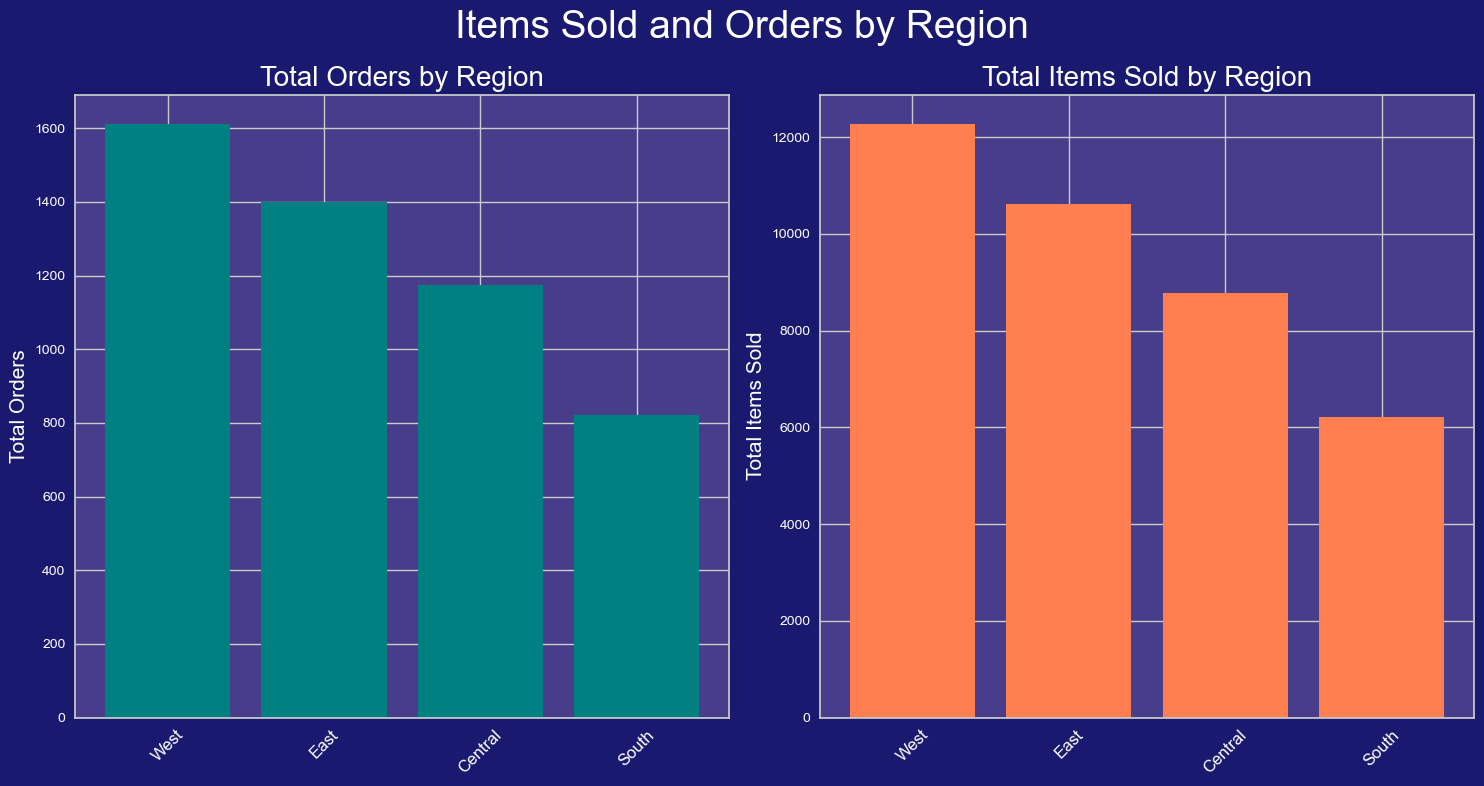

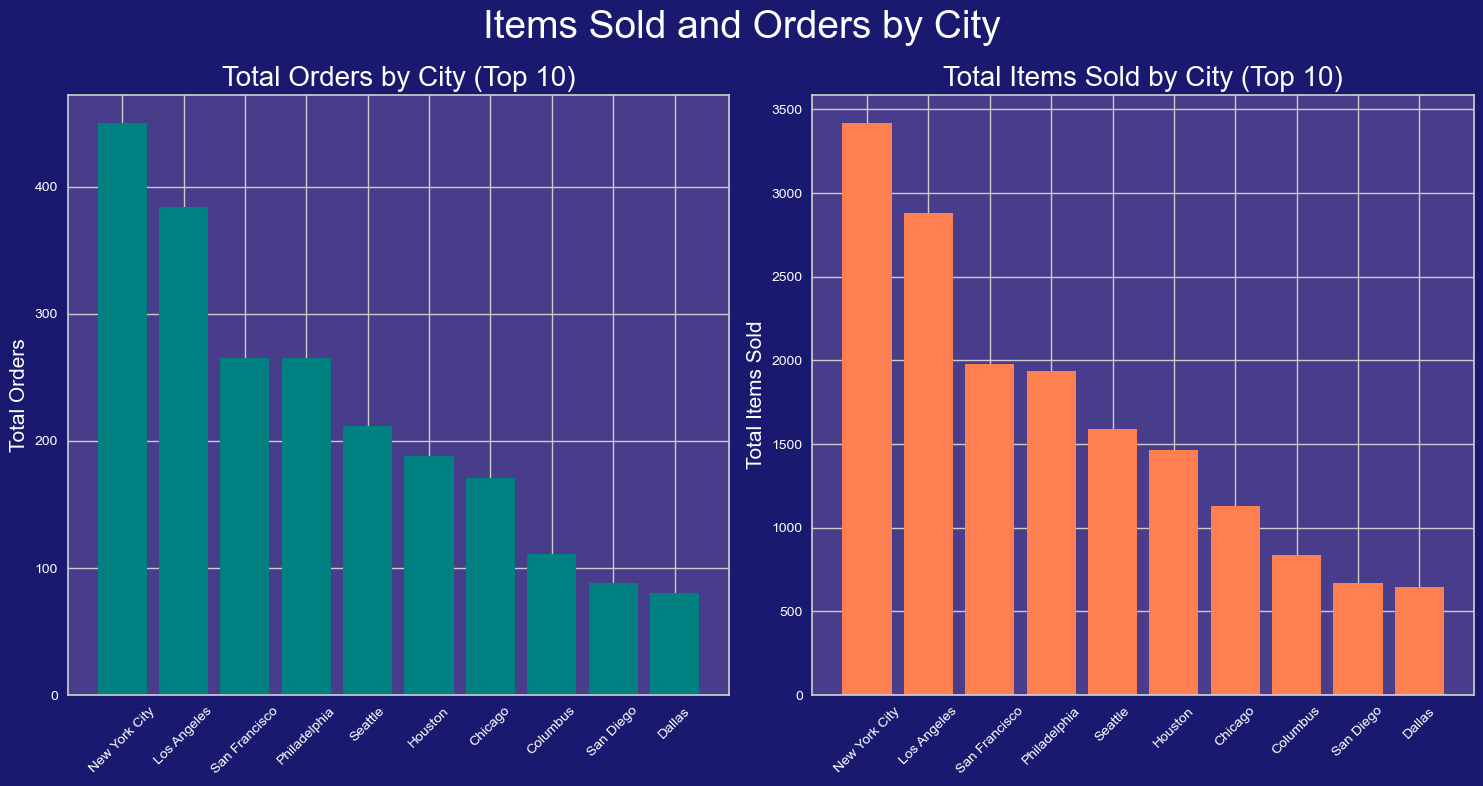

In [33]:
fig = plt.figure(figsize=(10,7))
(topfig, bottomfig) = fig.subfigures(2, 1)

# Top figure
topfig.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].bar(x=orders_by_region['Region'], height=orders_by_region['count'], color='teal')  # Suggested color
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=12, color='white')  # Suggested color
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=10, color='white')  # Suggested color
axes[0].set_ylabel('Total Orders', fontsize=15, color='white')  # Suggested color
axes[0].set_title('Total Orders by Region', fontsize=20, color='white')  # Suggested color
axes[0].set_facecolor('darkslateblue')  # Suggested background color

axes[1].bar(x=items_by_region['Region'], height=items_by_region['items sold'], color='coral')  # Suggested color
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12, color='white')  # Suggested color
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=10, color='white')  # Suggested color
axes[1].set_ylabel('Total Items Sold', fontsize=15, color='white')  # Suggested color
axes[1].set_title('Total Items Sold by Region', fontsize=20, color='white')  # Suggested color
axes[1].set_facecolor('darkslateblue')  # Suggested background color

fig.suptitle("Items Sold and Orders by Region", fontsize=28, color='white')  # Suggested color
fig.set_facecolor('midnightblue')  # Suggested background color

plt.tight_layout()

# Bottom figure
bottomfig.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].bar(x=obc['City'], height=obc['count'], color='teal')  # Suggested color
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=10, color='white')  # Suggested color
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=10, color='white')  # Suggested color
axes[0].set_ylabel('Total Orders', fontsize=15, color='white')  # Suggested color
axes[0].set_title('Total Orders by City (Top 10)', fontsize=20, color='white')  # Suggested color
axes[0].set_facecolor('darkslateblue')  # Suggested background color

axes[1].bar(x=obc['City'], height=ibc['items sold'], color='coral')  # Suggested color
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=10, color='white')  # Suggested color
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=10, color='white')  # Suggested color
axes[1].set_ylabel('Total Items Sold', fontsize=15, color='white')  # Suggested color
axes[1].set_title('Total Items Sold by City (Top 10)', fontsize=20, color='white')  # Suggested color
axes[1].set_facecolor('darkslateblue')  # Suggested background color

fig.suptitle("Items Sold and Orders by City", fontsize=28, color='white')  # Suggested color
fig.set_facecolor('midnightblue')  # Suggested background color

plt.tight_layout()
plt.show()


<h1>2.2 Orders and Items Sold by Category</h1>


**Orders by Category**

In [34]:
orders_by_category = data.groupby('Category')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_category = data.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

In [35]:
orders_by_category.head(3)

Category  count
1  Office Supplies   3742
0        Furniture   1764
2       Technology   1544

In [36]:
items_by_category.head(10)

Category Sub-Category  items sold
6   Office Supplies      Binders        5974
10  Office Supplies        Paper        5178
2         Furniture  Furnishings        3563
16       Technology       Phones        3289
11  Office Supplies      Storage        3158
5   Office Supplies          Art        3000
13       Technology  Accessories        2976
1         Furniture       Chairs        2356
4   Office Supplies   Appliances        1729
9   Office Supplies       Labels        1400

**Please Note.** If one sums the counts over *order_by_category*, one expects to find the total number of orders (5009). However, the number one gets (7050) is larger than 5009. This is because an order is identified by a single *Order ID*, but it can span over multiple rows of the dataframe: this means that a customer can buy multiple items, belonging to different product categories.

In [37]:
items_by_category['items sold'].sum(), data['Quantity'].sum()

(37873, 37873)

On the contrary, if one sums the number of items sold within *items_by_category*, one gets 37873 (that is the total number of items sold by Superstore).

We are introducing another Column Named *ALL* to indicate that this Column contain all the types of category... The value of This Column is 'All'

In [38]:
items_by_category['ALL'] = 'All'

In [39]:
items_by_category

Category Sub-Category  items sold  ALL
6   Office Supplies      Binders        5974  All
10  Office Supplies        Paper        5178  All
2         Furniture  Furnishings        3563  All
16       Technology       Phones        3289  All
11  Office Supplies      Storage        3158  All
5   Office Supplies          Art        3000  All
13       Technology  Accessories        2976  All
1         Furniture       Chairs        2356  All
4   Office Supplies   Appliances        1729  All
9   Office Supplies       Labels        1400  All
3         Furniture       Tables        1241  All
8   Office Supplies    Fasteners         914  All
7   Office Supplies    Envelopes         906  All
0         Furniture    Bookcases         868  All
12  Office Supplies     Supplies         647  All
15       Technology     Machines         440  All
14       Technology      Copiers         234  All

In [40]:
fig = px.treemap(items_by_category,path=['ALL','Category','Sub-Category'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Category',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

* From the diagram We can easily conclude that Office supplies were Mostly and more precisely Binders was the most sold Product in overall<br>
* And Then Comes Furniture as Second most sold category where Furnishings items were sold most<br>
* Then it is Technology where Phones were sold mostly

**Orders by Category and Region**

In [41]:
category_by_regions = data.groupby(['Region','Category'])['Quantity'].sum().reset_index(name='items sold').sort_values(['Region','items sold'],ascending=False)

#To check our evaluation
category_by_regions['items sold'].sum(), data['Quantity'].sum()

(37873, 37873)

In [42]:
category_by_regions.head()

Region         Category  items sold
10   West  Office Supplies        7235
9    West        Furniture        2696
11   West       Technology        2335
7   South  Office Supplies        3800
6   South        Furniture        1291

In [43]:
category_by_regions['All'] = 'All'

fig = px.treemap(category_by_regions,path=['All','Region','Category'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Category and Region',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

* In each of the region *Office Supplies* is the moslty sold category

<h1>2.3 Top Selling Products</h1>

**Products by Order**

I am counting the number of orders by product name.

In [44]:
products_by_order = data.groupby('Product Name')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

products_by_order['count'].sum(), data['Order ID'].nunique()

(9986, 5009)

In [45]:
products_by_order.head()

Product Name  count
1493          Staple envelope     48
1499                  Staples     46
537         Easy-staple paper     46
259   Avery Non-Stick Binders     20
1500  Staples in misc. colors     19

**Please Note.** As in the case of *order_by_category*, the number that we get here is larger than the number of total orders. This is because an order is identified by a single Order ID, but it can span over multiple rows of the dataframe: this means that a customer can place an order of multiple products.

In [46]:
orders_by_category['count'].sum()

7050

If the total number of *products_by_order* (9986) is larger than that of *orders_by_category* (7050), then we expect the total number of *orders_by_subcategory* to be halfway between these numbers (7050 and 9986). This is because, in a product hierarchy, product (name) preceeds sub-category and sub-category comes before category. In other words, the number of products is larger than that of product subcategories and this is larger than that of the product categories.
<br> Let's find out if this is true.

In [47]:
orders_by_subcategory = data.groupby('Sub-Category')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

orders_by_subcategory['count'].sum()

9159

In [48]:
orders_by_subcategory.head()

Sub-Category  count
3       Binders   1316
12        Paper   1191
9   Furnishings    877
13       Phones    814
14      Storage    777

Yes, this is how we expected.

Now, let's find out what are the top selling products.

In [49]:
pd.set_option('display.max_colwidth',None)

products_by_order = products_by_order.head(10)
products_by_order

Product Name  count
1493                                            Staple envelope     48
1499                                                    Staples     46
537                                           Easy-staple paper     46
259                                     Avery Non-Stick Binders     20
1500                                    Staples in misc. colors     19
1496                                             Staple remover     18
942                                  KI Adjustable-Height Table     18
1511                                    Storex Dura Pro Binders     17
1497                                 Staple-based wall hangings     16
993   Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     15

We can also have a look at the *products_by_items*. These are calculated by considering the orders and summing over the product quantities.

In [50]:
products_by_items = data.groupby('Product Name')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

products_by_items['items sold'].sum(), data['Quantity'].sum()

(37873, 37873)

And now, let's have a look at the top 10 selling products.

In [51]:
products_by_items = products_by_items.head(10)
total_items = data['Quantity'].sum()
products_by_items['percent of items sold'] = products_by_items['items sold'] / total_items*100

products_by_items

Product Name  items sold  \
1499                                                     Staples         215   
1493                                             Staple envelope         170   
537                                            Easy-staple paper         150   
1500                                     Staples in misc. colors          86   
942                                   KI Adjustable-Height Table          74   
259                                      Avery Non-Stick Binders          71   
1511                                     Storex Dura Pro Binders          71   
699   GBC Premium Transparent Covers with Diagonal Lined Pattern          67   
1450                  Situations Contoured Folding Chairs, 4/Set          64   
1497                                  Staple-based wall hangings          62   

      percent of items sold  
1499               0.567687  
1493               0.448869  
537                0.396061  
1500               0.227075  
942                0.195390  
259                0.187469  
1511               0.187469  
699                0.176907  
1450               0.168986  
1497               0.163705

I am changing the label names that are too long.

In [52]:
products_by_order[products_by_order['Product Name'].str.len() > 30]

Product Name  count
993  Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     15

In [53]:
products_by_items[products_by_items['Product Name'].str.len() > 30]

Product Name  items sold  \
699   GBC Premium Transparent Covers with Diagonal Lined Pattern          67   
1450                  Situations Contoured Folding Chairs, 4/Set          64   

      percent of items sold  
699                0.176907  
1450               0.168986

In [54]:
products_by_order = products_by_order.replace('Logitech 910-002974 M325 Wireless Mouse for Web Scrolling','Logitech Wireless Mouse')

products_by_items = products_by_items.replace('GBC Premium Transparent Covers with Diagonal Lined Pattern','GBC Transparent Covers')

products_by_items = products_by_items.replace('Situations Contoured Folding Chairs, 4/Set','Situations Folding Chairs')

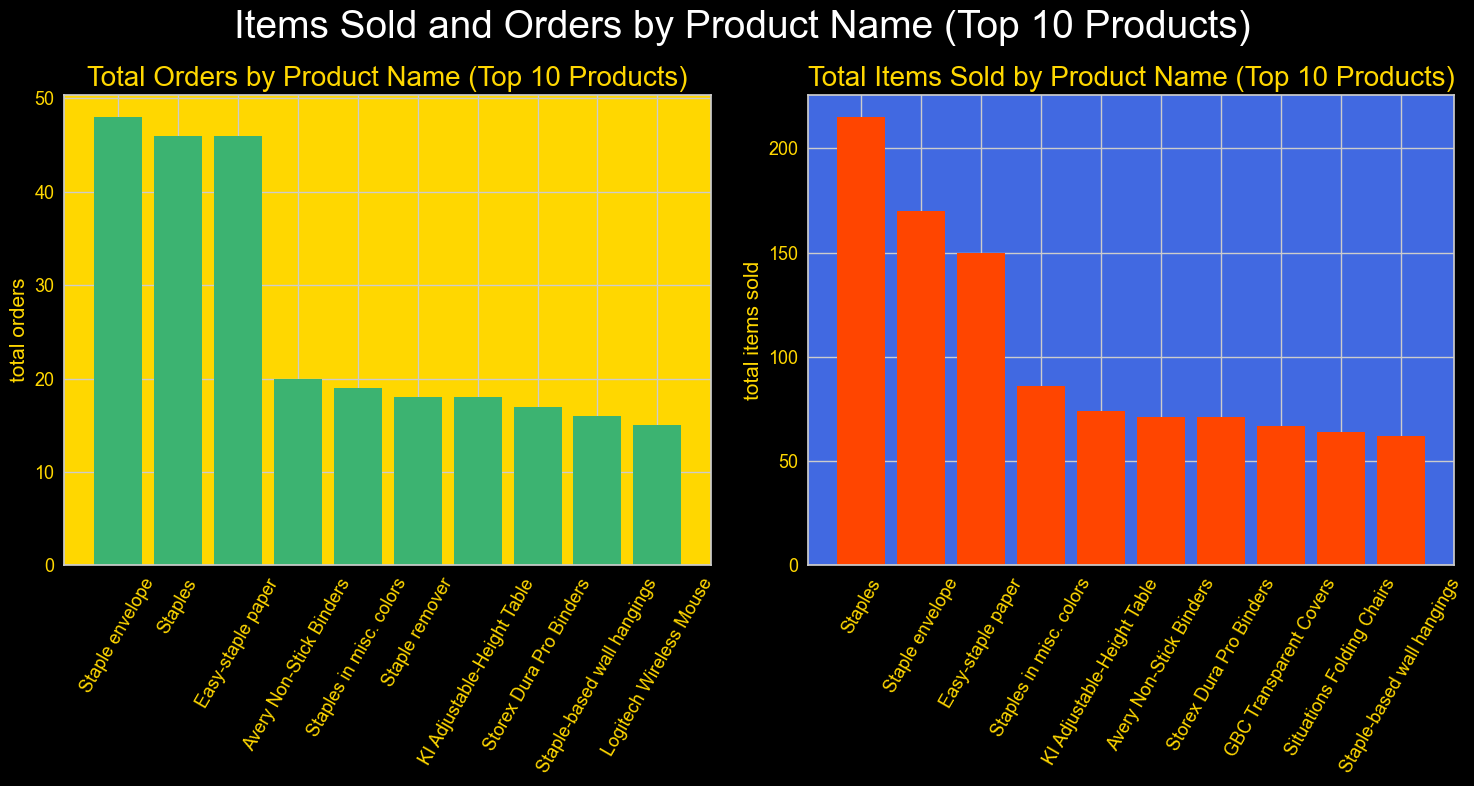

In [56]:
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=products_by_order['Product Name'],height=products_by_order['count'],color='mediumseagreen');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=60,fontsize=12,color='gold');
axes[0].set_yticklabels(axes[0].get_yticklabels(),fontsize=10,color='gold');
axes[0].xaxis.set_tick_params(labelsize=13,color='gold')
axes[0].yaxis.set_tick_params(labelsize=13,color='gold')
axes[0].set_ylabel('total orders',fontsize=15,color='gold')
axes[0].set_title('Total Orders by Product Name (Top 10 Products)',fontsize=20,color='gold');
axes[0].set_facecolor('gold')

axes[1].bar(x=products_by_items['Product Name'],height=products_by_items['items sold'],color='orangered');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=60,fontsize=12,color='gold');
axes[1].set_yticklabels(axes[1].get_yticklabels(),fontsize=10,color='gold');
axes[1].xaxis.set_tick_params(labelsize=13,color='gold')
axes[1].yaxis.set_tick_params(labelsize=13,color='gold')
axes[1].set_ylabel('total items sold',fontsize=15,color='gold')
axes[1].set_title('Total Items Sold by Product Name (Top 10 Products)',fontsize=20,color='gold');
axes[1].set_facecolor('royalblue')

fig.suptitle("Items Sold and Orders by Product Name (Top 10 Products)",fontsize=28,color='white')
fig.set_facecolor('black')
plt.tight_layout()

<h1>2.4 Shipping Analysis</h1>

**Orders by Ship Mode and Region**

First, I want to find out what is the fraction of orders and items sold by *Ship Mode*.

In [57]:
val3 = data.groupby('Ship Mode')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)
val3['count'].sum(), data['Order ID'].nunique()

(5009, 5009)

In [58]:
val3

Ship Mode  count
3  Standard Class   2994
2    Second Class    964
0     First Class    787
1        Same Day    264

In [59]:
val4 = data.groupby('Ship Mode')['Quantity'].sum().reset_index(name='Items Sold').sort_values(["Items Sold"],ascending=False)

val4["Items Sold"].sum(), data["Quantity"].sum()

(37873, 37873)

In [60]:
val4

Ship Mode  Items Sold
3  Standard Class       22797
2    Second Class        7423
0     First Class        5693
1        Same Day        1960

**We can see that Mostly The products were Shipped using Standard Class ship Mode**

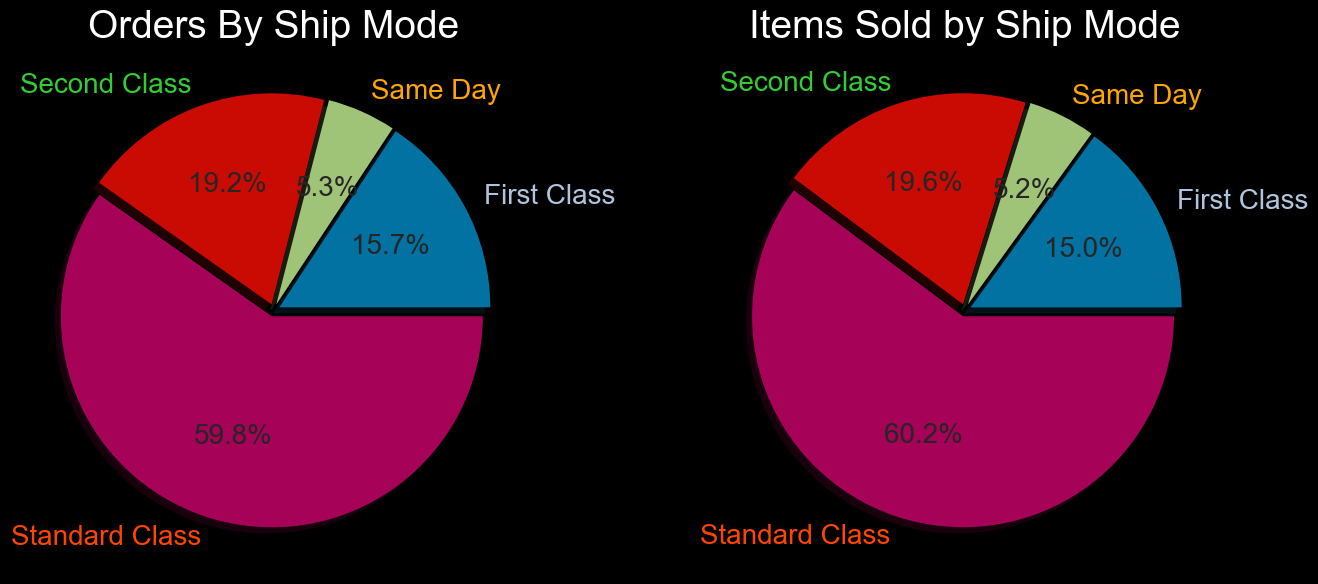

In [61]:
val3 = data.groupby('Ship Mode')['Order ID'].nunique()
labels3 = ['First Class','Same Day','Second Class','Standard Class']
colorlist3 = ['lightsteelblue','orange','limegreen','orangered']

val4 = data.groupby('Ship Mode')['Quantity'].sum()
labels4 = ['First Class','Same Day','Second Class','Standard Class']
colorlist4 = ['lightsteelblue','orange','limegreen','orangered']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))

# Plot #1
wedges,texts,auto = ax1.pie(val3,labels=labels3,autopct="%1.1f%%",textprops={'fontsize':20},
                                           shadow=True,explode=(0.03,0.03,0.03,0.03))
ax1.set_title('Orders By Ship Mode',color='white',fontsize=28)
for text,color in zip(texts,colorlist3):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')

# Plot #2
wedges,texts,auto = ax2.pie(val4,labels=labels4,autopct="%1.1f%%",textprops={'fontsize':20},
                                           shadow=True,explode=(0.03,0.03,0.03,0.03))
ax2.set_title('Items Sold by Ship Mode',color='white',fontsize=28)
for text,color in zip(texts,colorlist4):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')


plt.tight_layout()
plt.show()

I also want to find out what is the average number of items ordered by *Ship Mode*.

In [62]:
orders_by_shipmode_orderID = data.groupby(['Ship Mode','Order ID'])['Quantity'].sum().reset_index(name='count').sort_values(['count'],ascending=False)
orders_by_shipmode_orderID

Ship Mode        Order ID  count
3694  Standard Class  CA-2017-100111     52
3908  Standard Class  CA-2017-117457     46
3108  Standard Class  CA-2016-105732     46
2071  Standard Class  CA-2014-106439     45
1765    Second Class  CA-2017-140949     43
...              ...             ...    ...
1520    Second Class  CA-2016-146521      1
1526    Second Class  CA-2016-148201      1
1530    Second Class  CA-2016-149314      1
1534    Second Class  CA-2016-150889      1
0        First Class  CA-2014-101147      1

[5009 rows x 3 columns]

In [63]:
avg_orders_by_shipmode = orders_by_shipmode_orderID.groupby('Ship Mode')['count'].mean().reset_index(name='avg no. of orders')

avg_orders_by_shipmode

Ship Mode  avg no. of orders
0     First Class           7.233799
1        Same Day           7.424242
2    Second Class           7.700207
3  Standard Class           7.614228

Then, I want to see whether there is a difference in the *Ship Mode* by region.

In [64]:
orders_by_shipmode_region = data.groupby('Region')['Ship Mode'].value_counts(normalize=True).reset_index(name='Probability')
orders_by_shipmode_region

Region       Ship Mode  Probability
0   Central  Standard Class     0.619458
1   Central    Second Class     0.200172
2   Central     First Class     0.128713
3   Central        Same Day     0.051657
4      East  Standard Class     0.587430
5      East    Second Class     0.186096
6      East     First Class     0.172051
7      East        Same Day     0.054424
8     South  Standard Class     0.601235
9     South    Second Class     0.203086
10    South     First Class     0.144444
11    South        Same Day     0.051235
12     West  Standard Class     0.587574
13     West    Second Class     0.193881
14     West     First Class     0.160787
15     West        Same Day     0.057758

In [65]:
orders_by_shipmode_region['Percentage'] = (orders_by_shipmode_region['Probability']*100).round(2)
orders_by_shipmode_region.drop('Probability',axis=1,inplace=True)

orders_by_shipmode_region

Region       Ship Mode  Percentage
0   Central  Standard Class       61.95
1   Central    Second Class       20.02
2   Central     First Class       12.87
3   Central        Same Day        5.17
4      East  Standard Class       58.74
5      East    Second Class       18.61
6      East     First Class       17.21
7      East        Same Day        5.44
8     South  Standard Class       60.12
9     South    Second Class       20.31
10    South     First Class       14.44
11    South        Same Day        5.12
12     West  Standard Class       58.76
13     West    Second Class       19.39
14     West     First Class       16.08
15     West        Same Day        5.78

The difference in the *Ship Mode* between USA regions is little.

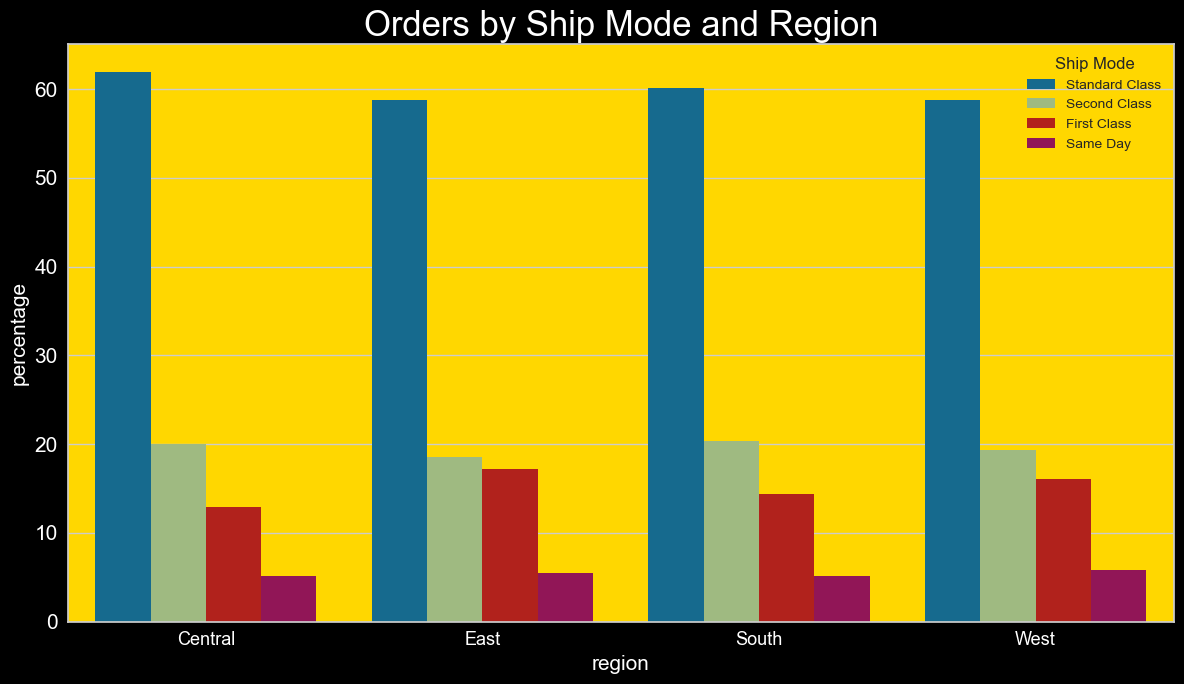

In [70]:
plt.figure(figsize=(12,7))
fig = sns.barplot(orders_by_shipmode_region,x="Region",y="Percentage",hue='Ship Mode')
#sns.move_legend(fig,"upper left",bbox_to_anchor=(1,1))

plt.xlabel("region",fontsize=15,color='white')
plt.xticks(fontsize=15,color='white')
plt.tick_params(labelsize=13,color='white')
plt.ylabel("percentage",fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')
plt.title("Orders by Ship Mode and Region",fontsize=25,color='white')

plt.tight_layout()
plt.gcf().patch.set_facecolor('black')
plt.gca().set_facecolor('gold')

**Difference Between the Shipping Classes**

What is the difference between the shipping classes?
I want to see what is the amount of time between the order and the shipment depending on the *Ship Mode* class.

To do so, I am creating a new feature (*order ship time*) that accounts for the time difference between the order and the ship date.

Then, I can calculate the average time difference between the order and the shipment based on the *Ship Mode* class.

In [67]:
data['order ship time'] = data['Ship Date'] - data['Order Date']

data.groupby('Ship Mode')['order ship time'].mean().to_frame()

order ship time
Ship Mode                               
First Class    2 days 04:23:05.695708712
Same Day       0 days 01:03:38.784530386
Second Class   3 days 05:42:47.197943444
Standard Class 5 days 00:09:24.611260053

There is a huge difference between the shipping classes. The mean value of the *order ship time* ranges from 0 to 5 days.

Let's have a look at the 4 *order ship time* distributions.

In [68]:
# Copy the original dataframe
data2 = data.copy()

# Convert the time (format days:hours:minutes:seconds to hours)
data2['order ship time'] = data2['order ship time'].apply(lambda x: x.total_seconds() / 3600)
# Convert the minutes (timedelta type) to integer
data2['order ship time'] = data2['order ship time'].astype(int)

data2.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Segment             City       State Region         Category  \
0   Consumer        Henderson    Kentucky  South        Furniture   
1   Consumer        Henderson    Kentucky  South        Furniture   
2  Corporate      Los Angeles  California   West  Office Supplies   
3   Consumer  Fort Lauderdale     Florida  South        Furniture   
4   Consumer  Fort Lauderdale     Florida  South  Office Supplies   

  Sub-Category                                                 Product Name  \
0    Bookcases                            Bush Somerset Collection Bookcase   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back   
2       Labels    Self-Adhesive Address Labels for Typewriters by Universal   
3       Tables                Bretford CR4500 Series Slim Rectangular Table   
4      Storage                               Eldon Fold 'N Roll Cart System   

      Sales  Quantity  Discount    Profit  year     month      day  \
0  261.9600         2      0.00   41.9136  2016  November  Tuesday   
1  731.9400         3      0.00  219.5820  2016  November  Tuesday   
2   14.6200         2      0.00    6.8714  2016      June   Sunday   
3  957.5775         5      0.45 -383.0310  2015   October   Sunday   
4   22.3680         2      0.20    2.5164  2015   October   Sunday   

   order ship time  
0               72  
1               72  
2               96  
3              168  
4              168

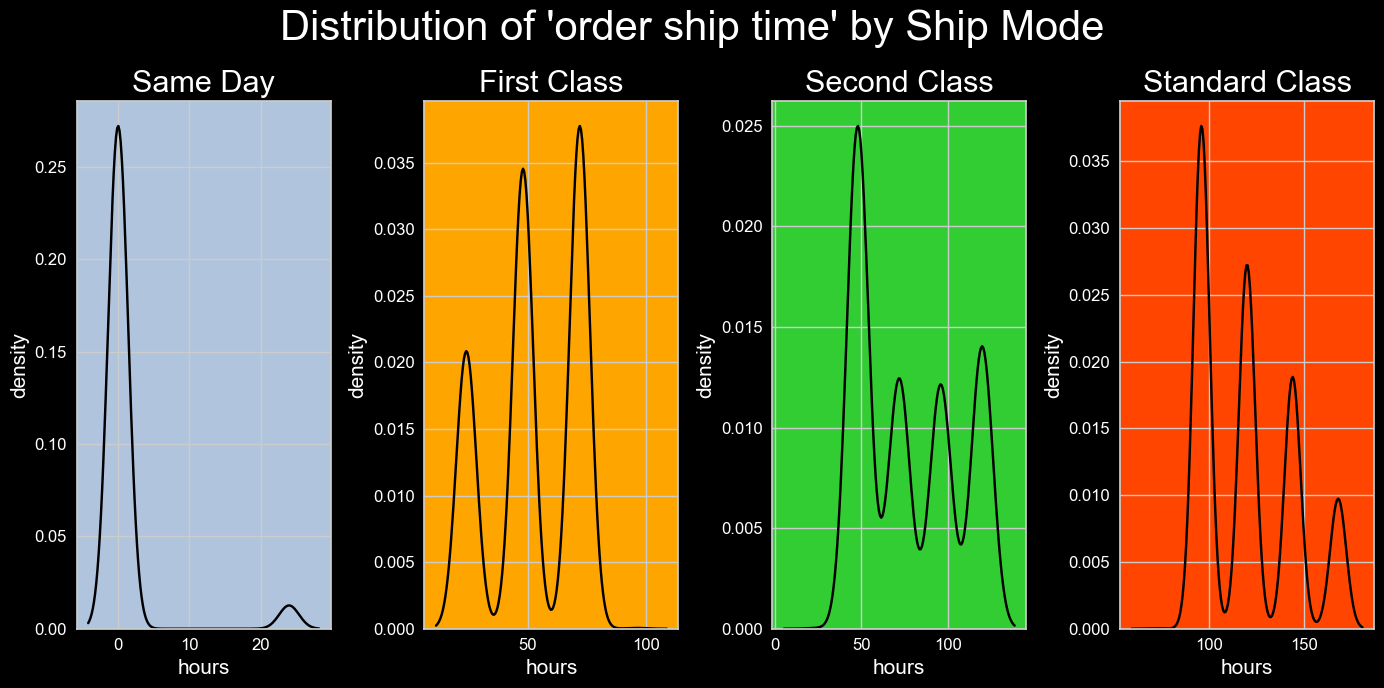

In [69]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(14,7))

ax1 = sns.distplot(data2[data2['Ship Mode'] == 'Same Day']['order ship time'],color='black',hist=False,ax=ax1)
ax1.xaxis.set_tick_params(labelsize=13,color='white')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='white')
ax1.yaxis.set_tick_params(labelsize=13,color='white')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=12,color='white')
ax1.set_facecolor('lightsteelblue')
ax1.set_xlabel('hours',fontsize=15,color='white')
ax1.set_ylabel('density',fontsize=15,color='white')
ax1.set_title('Same Day',fontsize=22,color='white')

ax2 = sns.distplot(data2[data2['Ship Mode'] == 'First Class']['order ship time'],color='black',hist=False,ax=ax2)
ax2.xaxis.set_tick_params(labelsize=13,color='white')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='white')
ax2.yaxis.set_tick_params(labelsize=13,color='white')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=12,color='white')
ax2.set_facecolor('orange')
ax2.set_xlabel('hours',fontsize=15,color='white')
ax2.set_ylabel('density',fontsize=15,color='white')
ax2.set_title('First Class',fontsize=22,color='white')

ax3 = sns.distplot(data2[data2['Ship Mode'] == 'Second Class']['order ship time'],color='black',hist=False,ax=ax3)
ax3.xaxis.set_tick_params(labelsize=13,color='white')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=12,color='white')
ax3.yaxis.set_tick_params(labelsize=13,color='white')
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=12,color='white')
ax3.set_facecolor('limegreen')
ax3.set_xlabel('hours',fontsize=15,color='white')
ax3.set_ylabel('density',fontsize=15,color='white')
ax3.set_title('Second Class',fontsize=22,color='white')

ax4 = sns.distplot(data2[data2['Ship Mode'] == 'Standard Class']['order ship time'],color='black',hist=False,ax=ax4)
ax4.xaxis.set_tick_params(labelsize=13,color='white')
ax4.set_xticklabels(ax4.get_xticklabels(),fontsize=12,color='white')
ax4.yaxis.set_tick_params(labelsize=13,color='white')
ax4.set_yticklabels(ax4.get_yticklabels(),fontsize=12,color='white')
ax4.set_facecolor('orangered')
ax4.set_xlabel('hours',fontsize=15,color='white')
ax4.set_ylabel('density',fontsize=15,color='white')
ax4.set_title('Standard Class',fontsize=22,color='white')

fig.suptitle("Distribution of 'order ship time' by Ship Mode",fontsize=30,color='white')

fig.set_facecolor('black')
plt.tight_layout()

It is worth to note that:
- The four distributions are multi-peaked. Only the first one (*Same Day*) has a peak that hugely dominates over the others.
- The distributions second to fourth are largely spread. This means that the delivery time is quite random.
- Final, and most important, there are delivery times of one or two hours. This is almost impossible for an e-commerce company in the real world, even for really big ones or local ones. This is a clear sign that **this data has synthetic origin.**

<h1>**3. Profit and Sales Analysis**</h1>

3.1 Sales and Profits by Category, Year and Month

**Sales and Profits by Year**

First, I am printing the total sales, profits and sale to profit ratios of Superstore.

In [76]:
data["Customer ID"].nunique()

793

In [77]:
data.groupby('Customer ID')['Sales'].sum().reset_index(name='Spends').sort_values(['Spends'],ascending=False)

Customer ID     Spends
700    SM-20320  25043.050
741    TC-20980  19052.218
621    RB-19360  15117.339
730    TA-21385  14595.620
6      AB-10105  14473.571
..          ...        ...
659    RS-19870     22.328
508    MG-18205     16.739
145    CJ-11875     16.520
456    LD-16855      5.304
760    TS-21085      4.833

[793 rows x 2 columns]

In [78]:
print('total sales = ${:.2f}.'.format(data['Sales'].sum()))

print('total profits = ${:.2f}.'.format(data['Profit'].sum()))

total sales = $2297200.86.
total profits = $286397.02.


The next step is to plot the sales and profits by year.

In [79]:
sales_by_year = data.groupby('year')['Sales'].sum().reset_index(name='sales').sort_values(['year'],ascending=True)
sales_by_year

year        sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552

In [80]:
profits_by_year = data.groupby('year')['Profit'].sum().reset_index(name='profits').sort_values(['year'],ascending=True)
profits_by_year

year     profits
0  2014  49543.9741
1  2015  61618.6037
2  2016  81795.1743
3  2017  93439.2696

In [81]:
sales_profits = sales_by_year.copy()
sales_profits = sales_profits.merge(profits_by_year,on=['year'])
sales_profits

year        sales     profits
0  2014  484247.4981  49543.9741
1  2015  470532.5090  61618.6037
2  2016  609205.5980  81795.1743
3  2017  733215.2552  93439.2696

In [82]:
sales_profits['profit Percentage'] = sales_profits['profits'] / sales_profits['sales'] * 100

sales_profits

year        sales     profits  profit Percentage
0  2014  484247.4981  49543.9741          10.231126
1  2015  470532.5090  61618.6037          13.095504
2  2016  609205.5980  81795.1743          13.426530
3  2017  733215.2552  93439.2696          12.743771

I am defining a function to print the features' values on top of the histograms.

In [83]:
def autolabel(rects,ax,color,FS):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2.,1.02*height,
                    '%d' % int(height),
                    ha='center',va='bottom',fontsize=FS,color=color)
        else:
            ax.text(rect.get_x() + rect.get_width()/2.,-0.001*height,
                    '%d' % int(height),
                    ha='center',va='bottom',fontsize=FS,color=color)

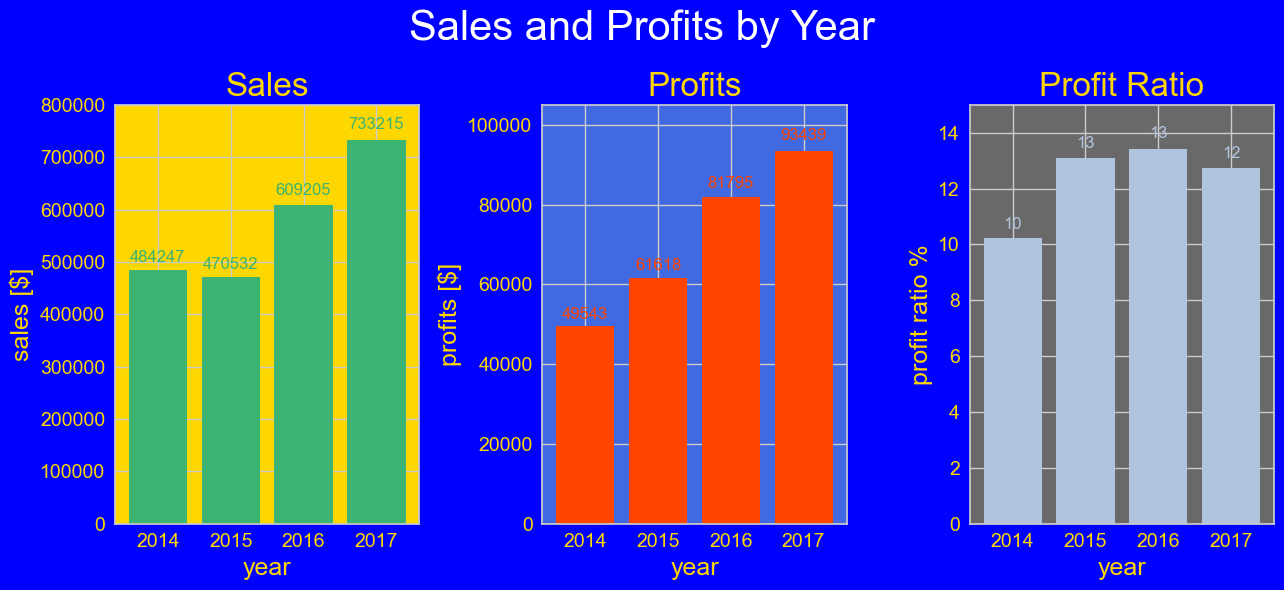

In [84]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(13,6))

### Plot #1 ###
fig1 = ax1.bar(sales_profits['year'],sales_profits['sales'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,800000])
ax1.set_title('Sales',fontsize=24,color='gold')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xlabel('year',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('sales [$]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',12)

### Plot #2 ###
fig2 = ax2.bar(sales_profits['year'],sales_profits['profits'],color='orangered',linewidth=3)
ax2.set_ylim([0,105000])
ax2.set_title('Profits',fontsize=24,color='gold')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xlabel('year',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('profits [$]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',12)

### Plot #3 ###
fig3 = ax3.bar(sales_profits['year'],sales_profits['profit Percentage'],color='lightsteelblue',linewidth=3)
ax3.set_ylim([0,15])
ax3.set_title('Profit Ratio',fontsize=24,color='gold')
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
ax3.xaxis.set_tick_params(labelsize=13,color='gold')
ax3.set_xlabel('year',fontsize=18,color='gold')
ax3.yaxis.set_tick_params(labelsize=13,color='gold')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=12,color='gold')
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=10,color='gold')
ax3.set_ylabel('profit ratio %',fontsize=18,color='gold')
ax3.yaxis.set_tick_params(labelsize=14)
ax3.set_xticklabels(ax3.get_xticklabels())
ax3.xaxis.set_tick_params(labelsize=14)
ax3.set_facecolor('dimgrey')
autolabel(fig3,ax3,'lightsteelblue',12)

fig.suptitle("Sales and Profits by Year",fontsize=30,color='white')
fig.set_facecolor('blue')
plt.tight_layout()

It is worth to note that:
- The sales and profits have increased in the 2014-2017 time frame.
- The sale to profit ratio increased between 2014 and 2015 and then it stayed pretty stable.
- Thus, in order to increase the profits, the company should either increase the sales or the sale to profit ratio.

**Sales and Profits by Month**

In [85]:
sales_by_month = data.groupby('month')['Sales'].sum().reset_index(name='sales').sort_values(['month'],ascending=True)

profits_by_month = data.groupby('month')['Profit'].sum().reset_index(name='profits').sort_values(['month'],ascending=True)

# I am dividing by four to average over the years 2014-2017
sales_by_month['sales']     = sales_by_month['sales'] / 4
profits_by_month['profits'] = profits_by_month['profits'] / 4

sales_profits_by_month = sales_by_month.copy()
sales_profits_by_month = sales_profits_by_month.merge(profits_by_month,on=['month'])

# Check
sales_profits_by_month['sales'].sum() * 4, data['Sales'].sum()

(2297200.8603, 2297200.8603000003)

In [86]:
orders = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
sales_profits_by_month['month'] = pd.Categorical(sales_profits_by_month.month, ordered=True, categories=orders)

sales_profits_by_month = sales_profits_by_month.sort_values('month')

In [87]:
sales_profits_by_month

month         sales       profits
4     January  23731.208900   2283.611525
3    February  14937.812850   2573.652675
7       March  51251.372200   7148.671800
0       April  34440.532150   2896.859075
8         May  38757.202925   5602.826950
6        June  38179.669825   5321.448850
5        July  36809.524250   3458.166200
1      August  39761.015750   5444.234600
11  September  76912.486425   9214.368825
10    October  50080.746175   7946.010325
9    November  88115.267750   8867.106625
2    December  81323.375875  10842.297975

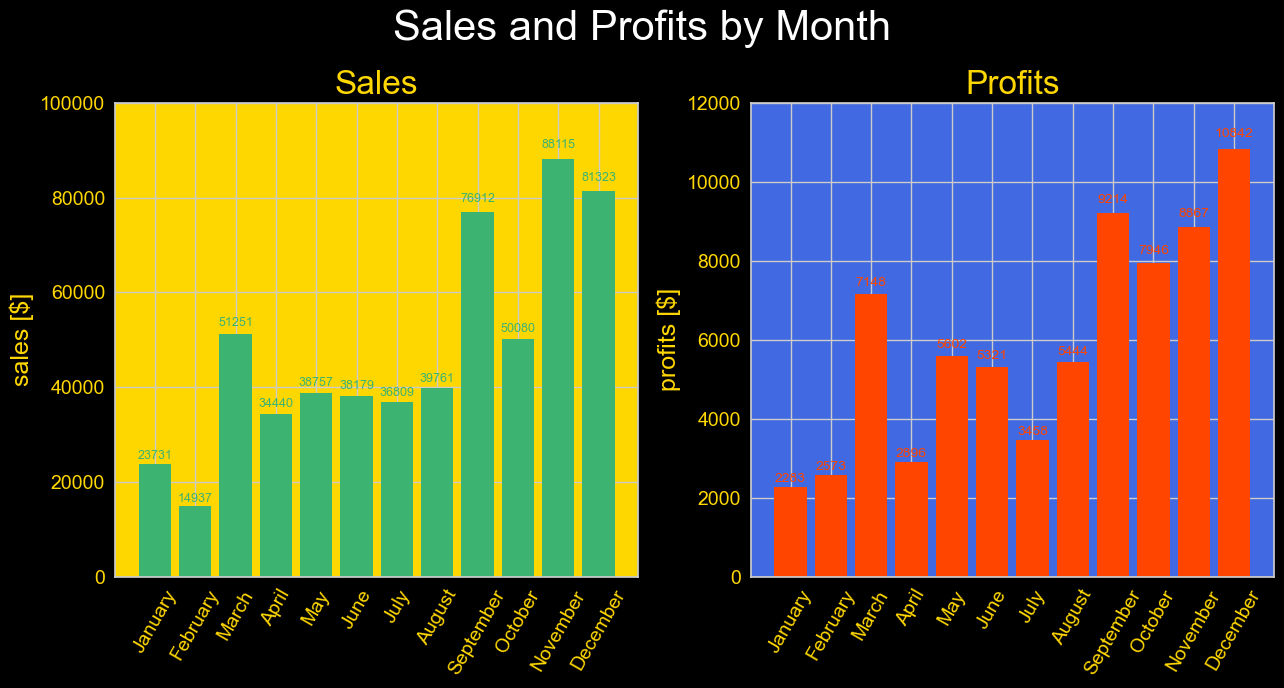

In [88]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,7))

### Plot #1 ###
fig1 = ax1.bar(sales_profits_by_month['month'],sales_profits_by_month['sales'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,100000])
ax1.set_title('Sales',fontsize=24,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('sales [$]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=60)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',9)

### Plot #2 ###
fig2 = ax2.bar(sales_profits_by_month['month'],sales_profits_by_month['profits'],color='orangered',linewidth=3)
ax2.set_ylim([0,12000])
ax2.set_title('Profits',fontsize=24,color='gold')
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('profits [$]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',10)

fig.suptitle("Sales and Profits by Month",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

It is worth to note that:
- As expected, November and December are the months with the highest sales. This is because of Christmas holidays and the end of the year.
- January and February are the months with the lowest amount of sales. This is because people do not have much money to spend after the Christmas holidays.
- Also September sales are so high.

Now, let's see what are the products that sell the most in each month.

In [89]:
category_by_month = data.groupby(['month','Category'])['Sales'].sum().reset_index(name='sales')
category_by_month['month'] = pd.Categorical(category_by_month.month, ordered=True, categories=orders)

category_by_month = category_by_month.sort_values(['month','sales'],ascending=True)

In [90]:

category_by_month['sales'].sum(), data['Sales'].sum()

(2297200.8603, 2297200.8603000003)

In [91]:
category_by_month['All'] = 'All'

fig = px.treemap(category_by_month,path=['All','Category','month'],values='sales',width=950,height=700);
fig.update_layout(title_text='Sales by Category and Month',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

One can notice that:
- Technology sells the most in November.
- Furniture sells the most In November and December.
- Office Supplies sell the most in September, November and December.

**Sales and Profits by Category**

I want to find out what are the fractions of sales and profits from the three product categories.

In [92]:
total_sales = data['Sales'].sum()

sales_table = data.groupby(['Category'])['Sales'].sum().reset_index(name='sales').sort_values(['sales'],ascending=False)

sales_table['sales fraction'] = sales_table['sales'] / total_sales * 100
sales_table

Category        sales  sales fraction
2       Technology  836154.0330       36.398821
0        Furniture  741999.7953       32.300171
1  Office Supplies  719047.0320       31.301008

In [93]:
total_profits = data['Profit'].sum()

profits_table = data.groupby(['Category'])['Profit'].sum().reset_index(name='profits').sort_values(['profits'],ascending=False)

profits_table['profits fraction'] = profits_table['profits'] / total_profits * 100
profits_table

Category      profits  profits fraction
2       Technology  145454.9481         50.787870
1  Office Supplies  122490.8008         42.769579
0        Furniture   18451.2728          6.442551

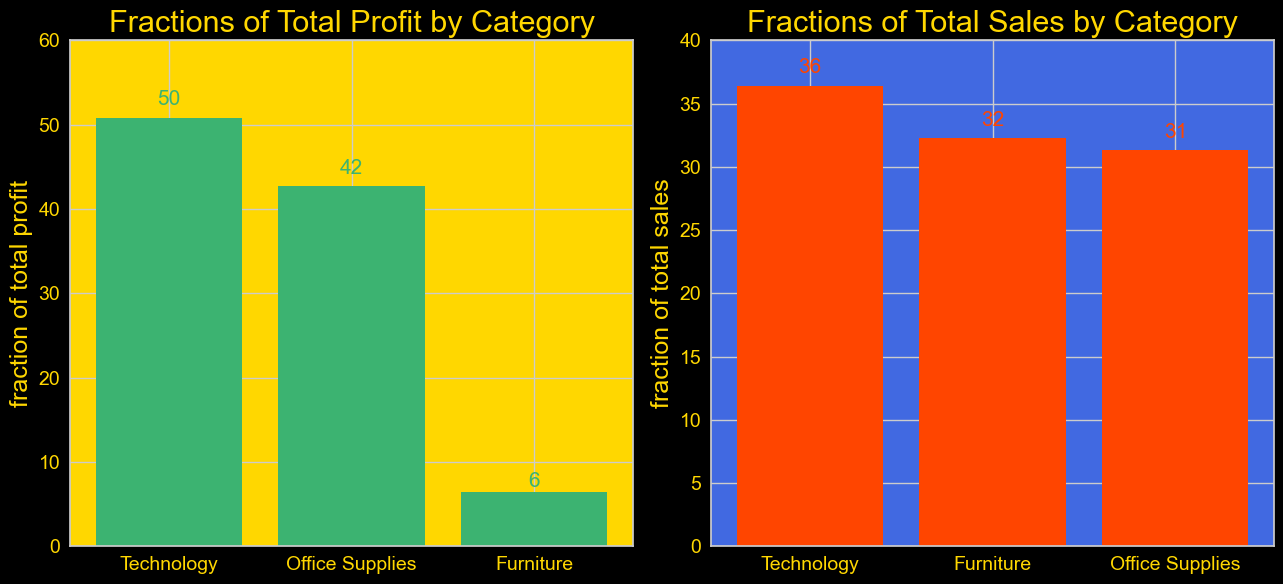

In [94]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,6))

### Plot #1 ###
fig1 = ax1.bar(profits_table['Category'],profits_table['profits fraction'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,60])
ax1.set_title('Fractions of Total Profit by Category',fontsize=22,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('fraction of total profit',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',15)

### Plot #2 ###
fig2 = ax2.bar(sales_table['Category'],sales_table['sales fraction'],color='orangered',linewidth=3)
ax2.set_ylim([0,40])
ax2.set_title('Fractions of Total Sales by Category',fontsize=22,color='gold')
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('fraction of total sales',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',15)

fig.set_facecolor('black')
plt.tight_layout()

One can notice that:
- Technology is the highest selling category. However, there is not a huge difference between the sales in technology and those in furniture and office supplies.
- In the case of profits, the situation is completely different. Technology and office supplies yields huge profits, while profit from furniture is very low.

<h1>3.2 Discounts</h1>

Let's discuss the discount that have been offered by Superstore in the years 2014-2017.

In [101]:
print('average discount = {:.1f}%.'.format(data['Discount'].mean() * 100))

average discount = 15.6%.


The average discount rate is pretty high. It might be hard to make profits with such low margins.

Let's see how the discount rate has changed through the years and months.

In [104]:
discount_by_year['avg discount'] = discount_by_year['avg discount'].apply(lambda x: f"{x:.2f}%")
discount_by_year


year avg discount
0  2014       15.83%
1  2015       15.56%
2  2016       15.47%
3  2017       15.65%

In [108]:
discount_by_month['avg discount'] = discount_by_month['avg discount'].apply(lambda x: f"{x:.2f}%")
discount_by_month


month avg discount
0     January       14.99%
1    February       14.62%
2       March       15.50%
3       April       16.31%
4         May       16.54%
5        June       16.28%
6        July       15.79%
7      August       15.42%
8   September       14.90%
9     October       16.26%
10   November       15.83%
11   December       15.04%

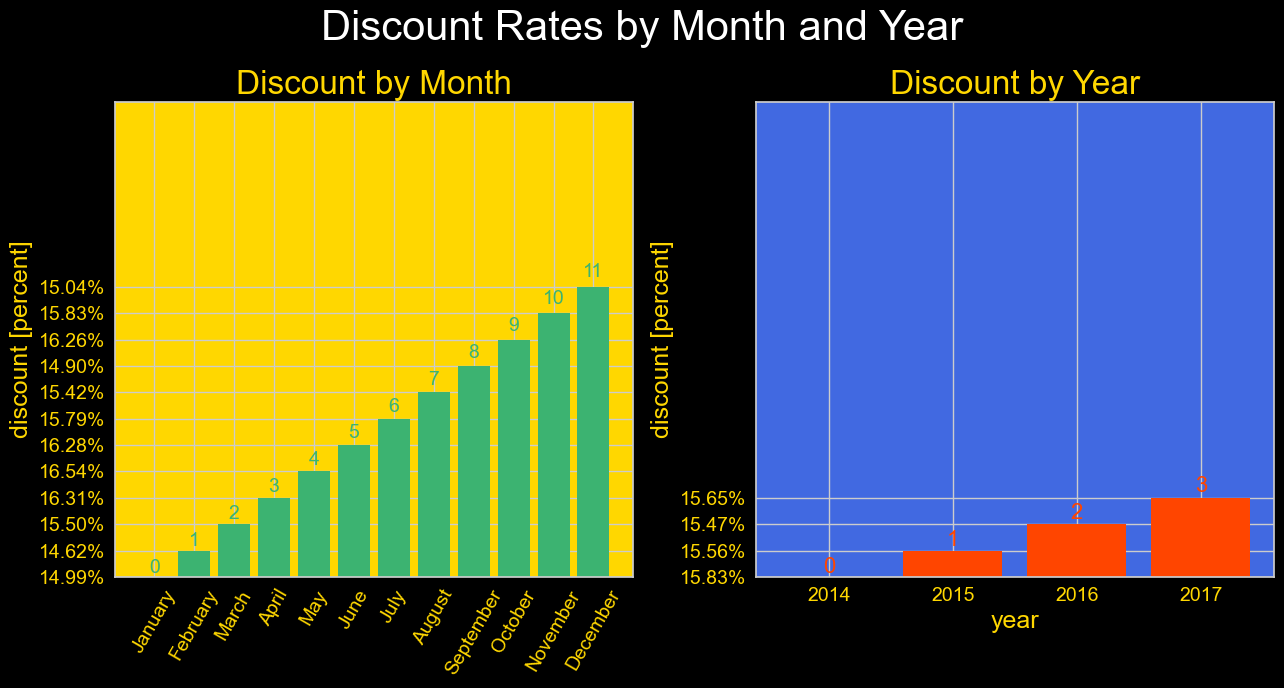

In [109]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,7))

### Plot #1 ###
fig1 = ax1.bar(discount_by_month['month'],discount_by_month['avg discount'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,18])
ax1.set_title('Discount by Month',fontsize=24,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('discount [percent]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=60)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',14)

### Plot #2 ###
fig2 = ax2.bar(discount_by_year['year'],discount_by_year['avg discount'],color='orangered',linewidth=3)
ax2.set_ylim([0,18])
ax2.set_title('Discount by Year',fontsize=24,color='gold')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xlabel('year',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('discount [percent]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',16)

fig.suptitle("Discount Rates by Month and Year",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

One can notice that:
- The average yearly discount rate did not change throughout 2014-2017.
- The discount rate oscillates during the year. It does not have a clear pattern. One would expect it to be higher during the months with low sales (like January and February) and to be lower during the most favorable months (September, November and December), but this is not the case.

<h1>3.3 Sales by Region</h1>

Previously, by studying the amount of items sold by Superstore, we have found out that the West is the top selling region and that New York is the top selling city. Unless there are areas where the customers buy products that are more expensive than average, we expect the trend of sales and profits to align with these findings.

In [110]:
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index(name='total sales').sort_values(['total sales'],ascending=False)

sales_by_region

Region  total sales
3     West  725457.8245
1     East  678781.2400
0  Central  501239.8908
2    South  391721.9050

In [111]:
sales_by_city = data.groupby('City')['Sales'].sum().reset_index(name='total sales').sort_values(['total sales'],ascending=False)

sales_by_city.head(5)

City  total sales
329  New York City   256368.161
266    Los Angeles   175851.341
452        Seattle   119540.742
438  San Francisco   112669.092
374   Philadelphia   109077.013

These results confirm our previous findings.

Let's see what are the least profitable cities.

In [112]:
sales_by_city.tail(5)

City  total sales
354  Ormond Beach        2.808
370     Pensacola        2.214
221       Jupiter        2.064
140        Elyria        1.824
1         Abilene        1.392

The sales in these small cities are extremely low. Therefore, the growth strategy of Superstore should be either to: (1) focus on the large cities and urban areas; (2) try to reach every single corner of the country.
<br> The first strategy is more reasonable.

Let's find out what is the fraction of sales that Superstores earns in the top10 (top 20) cities.

In [113]:
sales_top10_cities = (sales_by_city.head(10))['total sales'].sum()
sales_top20_cities = (sales_by_city.head(20))['total sales'].sum()

sales_minus_top10 = total_sales - sales_top10_cities
sales_minus_top20 = total_sales - sales_top20_cities

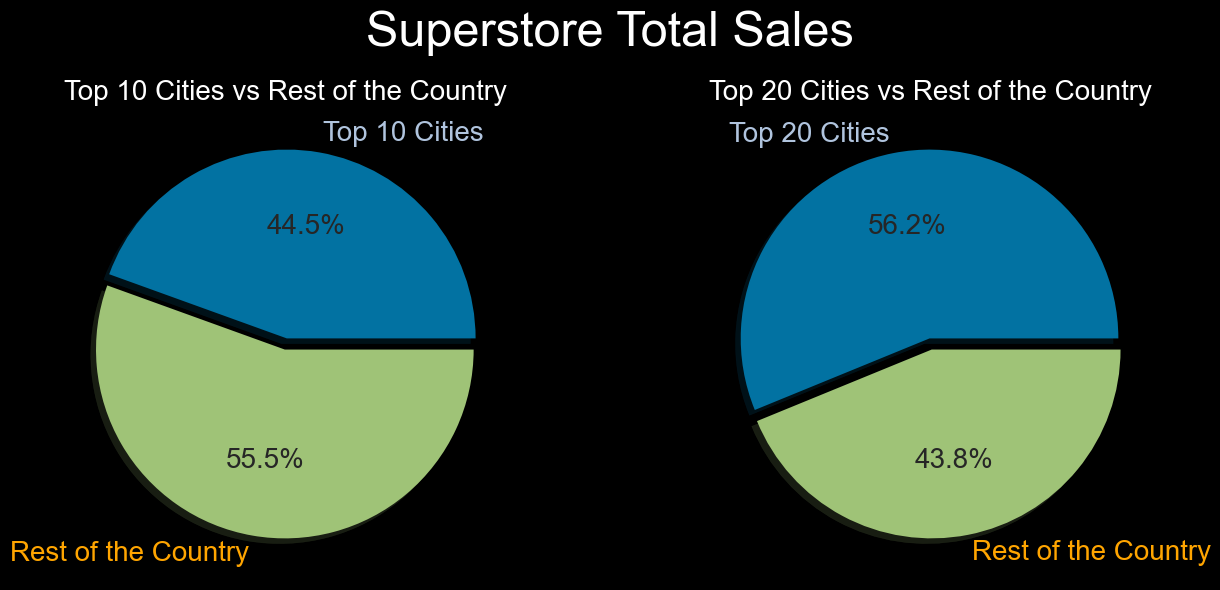

In [114]:
top10_sales_values = [sales_top10_cities,sales_minus_top10]
top10_sales_labels = ['Top 10 Cities','Rest of the Country']
colorlist = ['lightsteelblue','orange']

top20_sales_values = [sales_top20_cities,sales_minus_top20]
top20_sales_labels = ['Top 20 Cities','Rest of the Country']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))

# Plot #1
wedges,texts,auto = ax1.pie(top10_sales_values,labels=top10_sales_labels,autopct="%1.1f%%",
                            textprops={'fontsize':20},shadow=True,explode=(0.03,0.03))
ax1.set_title('Top 10 Cities vs Rest of the Country',color='white',fontsize=20)
for text,color in zip(texts,colorlist):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')

# Plot #2
wedges,texts,auto = ax2.pie(top20_sales_values,labels=top20_sales_labels,autopct="%1.1f%%",
                            textprops={'fontsize':20},shadow=True,explode=(0.03,0.03))
ax2.set_title('Top 20 Cities vs Rest of the Country',color='white',fontsize=20)
for text,color in zip(texts,colorlist):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')

fig.suptitle("Superstore Total Sales",fontsize=35,color='white')

plt.tight_layout()
plt.show()

As shown in the pie plots, the large majority of the sales is generated in the big cities.

<h1>3.4 Losses</h1>

**Losses by Product Sub-Category**

Not all the transactions are profitable. Some of them provide a negative profit (i.e. a loss).

In [118]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].mean().reset_index(name='avg sales').sort_values(['Sub-Category'],ascending=False)
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].mean().reset_index(name='avg profits').sort_values(['Sub-Category'],ascending=False)

sales_profit_by_subcategory = sales_by_subcategory.copy()
sales_profit_by_subcategory = sales_profit_by_subcategory.merge(profit_by_subcategory,on='Sub-Category').sort_values(['avg profits'],ascending=True)

sales_profit_by_subcategory.head(10)

Sub-Category   avg sales  avg profits
0        Tables  648.794771   -55.565771
12    Bookcases  503.859633   -15.230509
1      Supplies  245.650200    -6.258418
8     Fasteners   13.936774     4.375660
14          Art   34.068834     8.200737
7   Furnishings   95.825668    13.645918
6        Labels   34.303055    15.236962
13      Binders  133.560560    19.843574
4         Paper   57.284092    24.856620
2       Storage  264.590553    25.152277

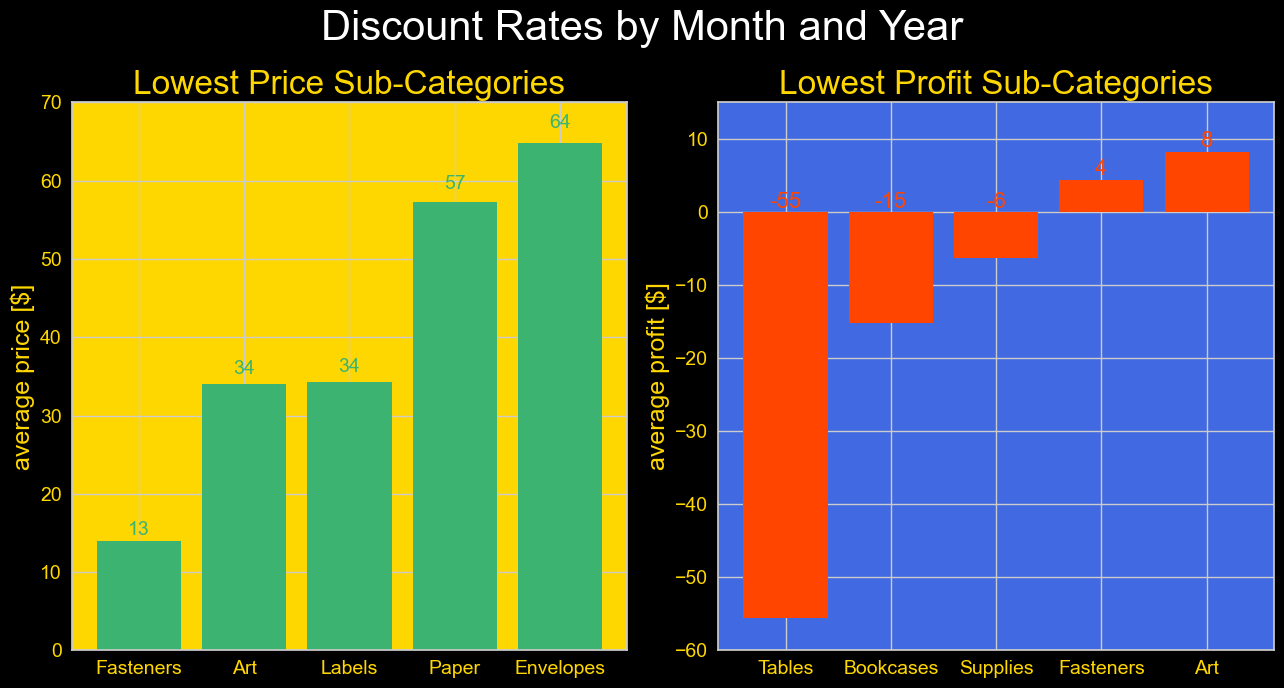

In [119]:
low_profits = (sales_profit_by_subcategory.sort_values(['avg profits'],ascending=True)).head(5)
low_sales   = (sales_profit_by_subcategory.sort_values(['avg sales'],ascending=True)).head(5)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,7))

### Plot #1 ###
fig1 = ax1.bar(low_sales['Sub-Category'],low_sales['avg sales'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,70])
ax1.set_title('Lowest Price Sub-Categories',fontsize=24,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('average price [$]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',14)

### Plot #2 ###
fig2 = ax2.bar(low_profits['Sub-Category'],low_profits['avg profits'],color='orangered',linewidth=3)
ax2.set_ylim([-60,15])
ax2.set_title('Lowest Profit Sub-Categories',fontsize=24,color='gold')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('average profit [$]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',16)

fig.suptitle("Discount Rates by Month and Year",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

Some sub-categories of products are highly unprofitable. Unless these items are old stocks (or funds of store) that need to be sold as fast as possible, these items should be taken off the Superstore inventory.

In [120]:
print('No. of orders of tables: {}.'.format(data[data['Sub-Category'] == 'Tables']['Sub-Category'].count()))

print('No. of orders of bookcases: {}.'.format(data[data['Sub-Category'] == 'Bookcases']['Sub-Category'].count()))

print('No. of orders of supplies: {}.'.format(data[data['Sub-Category'] == 'Supplies']['Sub-Category'].count()))

No. of orders of tables: 319.
No. of orders of bookcases: 228.
No. of orders of supplies: 190.


**Total Losses for each of the above Products *Tables*, *Bookcases*,*Supplies***

In [121]:
data.groupby('Sub-Category')['Profit'].sum().reset_index(name='total losses [$]').sort_values(['total losses [$]'],ascending=True).head(3)

Sub-Category  total losses [$]
16       Tables       -17725.4811
4     Bookcases        -3472.5560
15     Supplies        -1189.0995

These are the total losses (in dollars) of the unprofitable sub-categories.

**Losses by City**

I want to find out what are the least profitable cities in the 2014-2017 years.

In [122]:
profits_by_year_city = data.groupby(['year','City'])['Profit'].sum().reset_index(name='profits')

# Check
profits_by_year_city['profits'].sum(), data['Profit'].sum()

(286397.0217, 286397.0217)

In [123]:
profits_by_year_city

year         City   profits
0     2014        Akron    4.9140
1     2014  Albuquerque  137.5475
2     2014   Alexandria  224.7091
3     2014      Anaheim   43.2636
4     2014       Apopka   34.6984
...    ...          ...       ...
1208  2017    Woodstock    0.9100
1209  2017   Woonsocket   44.6628
1210  2017      Yonkers  234.6255
1211  2017         York   -5.2794
1212  2017         Yuma -479.9880

[1213 rows x 3 columns]

In [124]:
least_profits_2014 = profits_by_year_city[profits_by_year_city['year'] == 2014].sort_values(['profits'],ascending=True).head(5)

least_profits_2015 = profits_by_year_city[profits_by_year_city['year'] == 2015].sort_values(['profits'],ascending=True).head(5)

least_profits_2016 = profits_by_year_city[profits_by_year_city['year'] == 2016].sort_values(['profits'],ascending=True).head(5)

least_profits_2017 = profits_by_year_city[profits_by_year_city['year'] == 2017].sort_values(['profits'],ascending=True).head(5)

least_profits_2014

year          City    profits
226  2014   San Antonio -6100.8679
102  2014       Houston -3085.2932
108  2014  Jacksonville -2088.2107
192  2014  Philadelphia -1998.6756
193  2014       Phoenix -1154.4719

<Figure size 1000x700 with 0 Axes>

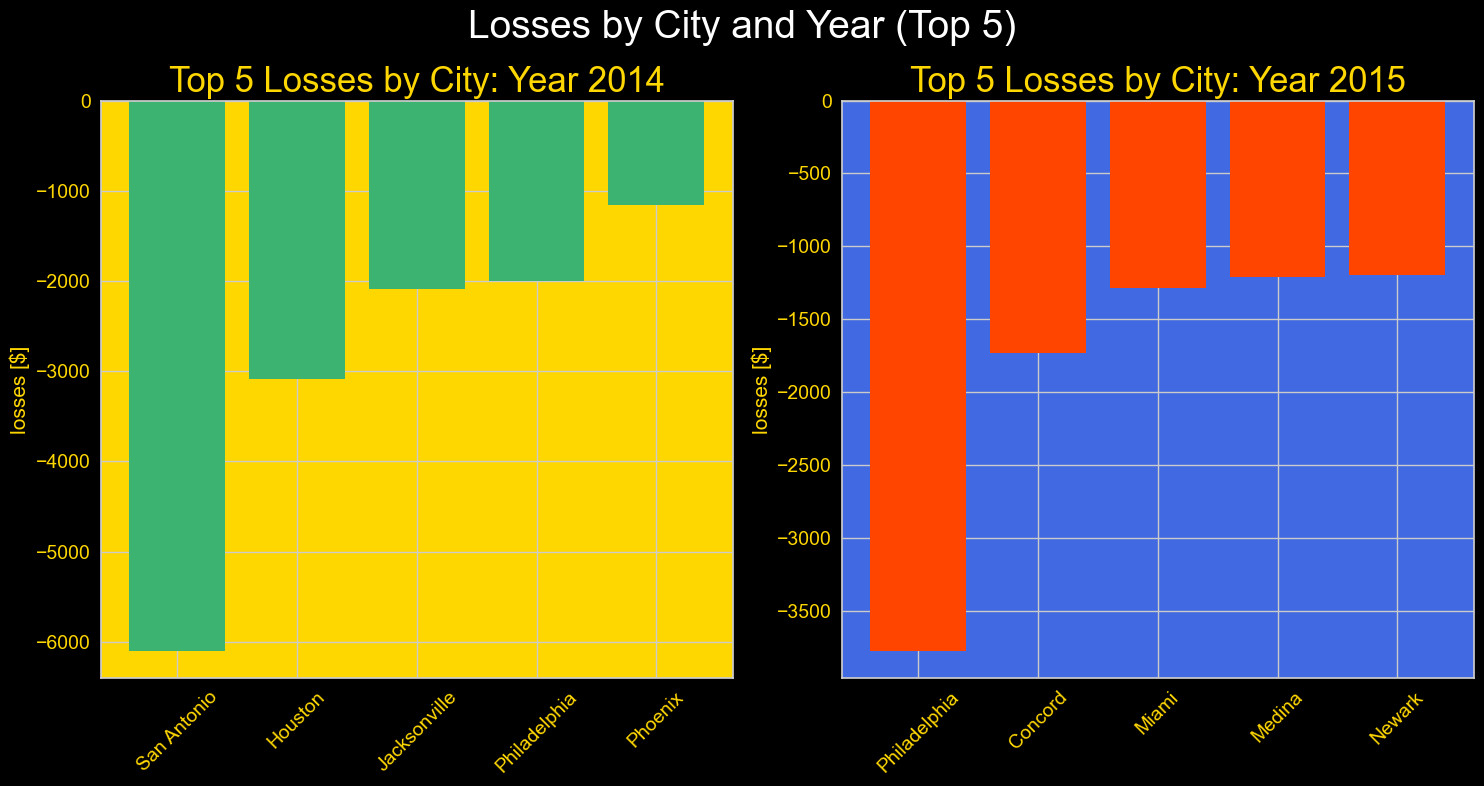

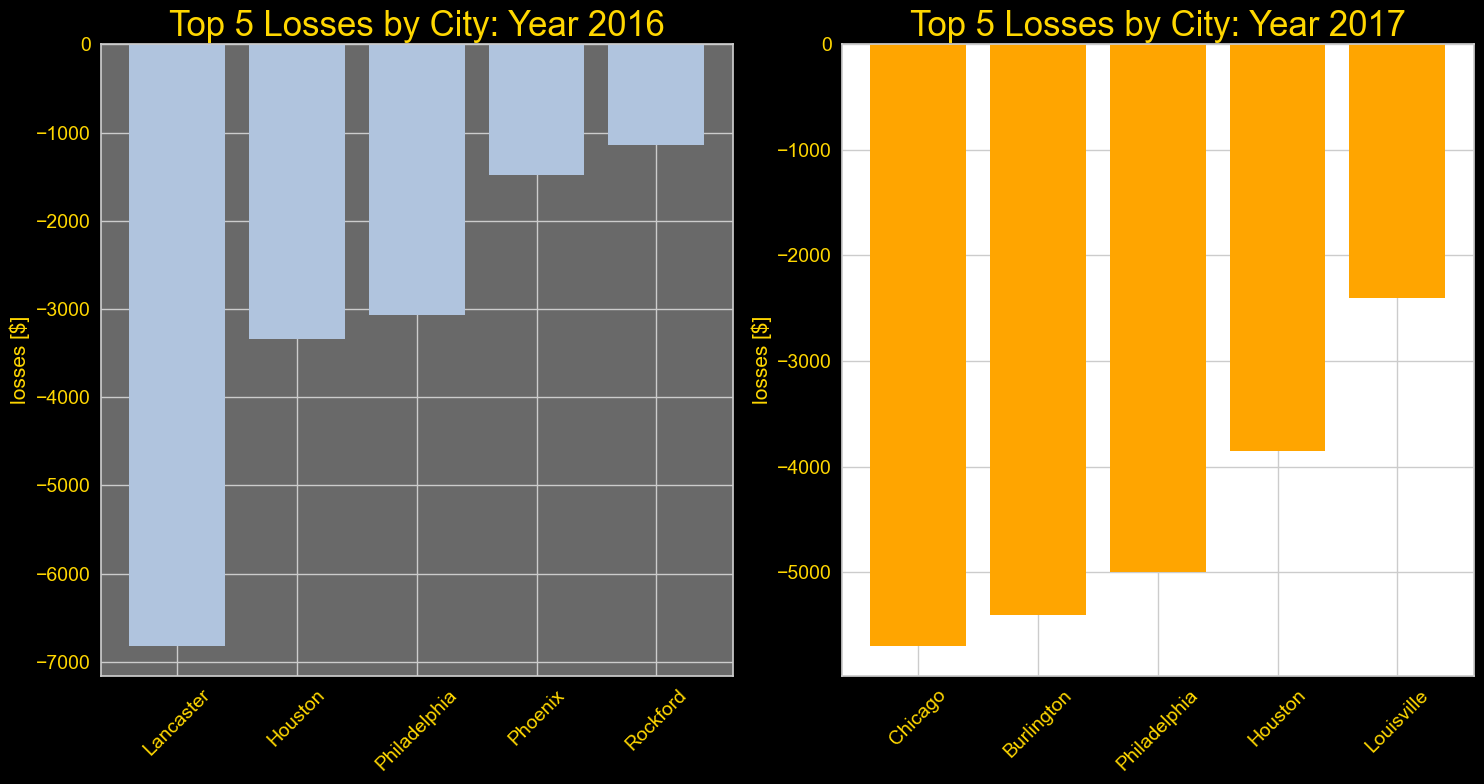

In [125]:
fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

# Top figure
topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=least_profits_2014['City'],height=least_profits_2014['profits'],color='mediumseagreen');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=14,color='gold');
axes[0].set_yticklabels(axes[0].get_yticklabels(),fontsize=14,color='gold');
axes[0].set_ylabel('losses [$]',fontsize=15,color='gold')
axes[0].set_title('Top 5 Losses by City: Year 2014',fontsize=25,color='gold');
axes[0].set_facecolor('gold')

axes[1].bar(x=least_profits_2015['City'],height=least_profits_2015['profits'],color='orangered');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,fontsize=14,color='gold');
axes[1].set_yticklabels(axes[1].get_yticklabels(),fontsize=14,color='gold');
axes[1].set_ylabel('losses [$]',fontsize=15,color='gold')
axes[1].set_title('Top 5 Losses by City: Year 2015',fontsize=25,color='gold');
axes[1].set_facecolor('royalblue')

fig.suptitle("Losses by City and Year (Top 5)",fontsize=28,color='white')
fig.set_facecolor('black')
plt.tight_layout()

# Bottom figure
bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=least_profits_2016['City'],height=least_profits_2016['profits'],color='lightsteelblue');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=14,color='gold');
axes[0].set_yticklabels(axes[0].get_yticklabels(),fontsize=14,color='gold');
axes[0].set_ylabel('losses [$]',fontsize=15,color='gold')
axes[0].set_title('Top 5 Losses by City: Year 2016',fontsize=25,color='gold');
axes[0].set_facecolor('dimgrey')

axes[1].bar(x=least_profits_2017['City'],height=least_profits_2017['profits'],color='orange');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,fontsize=14,color='gold');
axes[1].set_yticklabels(axes[1].get_yticklabels(),fontsize=14,color='gold');
axes[1].set_ylabel('losses [$]',fontsize=15,color='gold')
axes[1].set_title('Top 5 Losses by City: Year 2017',fontsize=25,color='gold');
axes[1].set_facecolor('white')

fig.set_facecolor('black')
plt.tight_layout()

plt.tight_layout()
plt.show()

Some cities (like Philadelphia and Houston) are constantly in the chart of the worst 5 cities for losses. Superstore has to do something to solve this major issue.

<h1>4. Customer Behavior and Customer Segmentation</h1>

<h2>4.1 Customer Segments</h2>

I want to get some more information about the customer segments (Consumer, Corporate or Home Office).

**Orders by Segment and Region**

In [126]:
orders_by_segment = data.groupby('Segment')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

orders_by_segment['count'].sum(), data['Order ID'].nunique()

(5009, 5009)

In [127]:
orders_by_segment.head()

Segment  count
0     Consumer   2586
1    Corporate   1514
2  Home Office    909

In [128]:
orders_by_region = data.groupby('Region')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

orders_by_region['count'].sum(), data['Order ID'].nunique()

(5009, 5009)

In [129]:
orders_by_region

Region  count
3     West   1611
1     East   1401
0  Central   1175
2    South    822

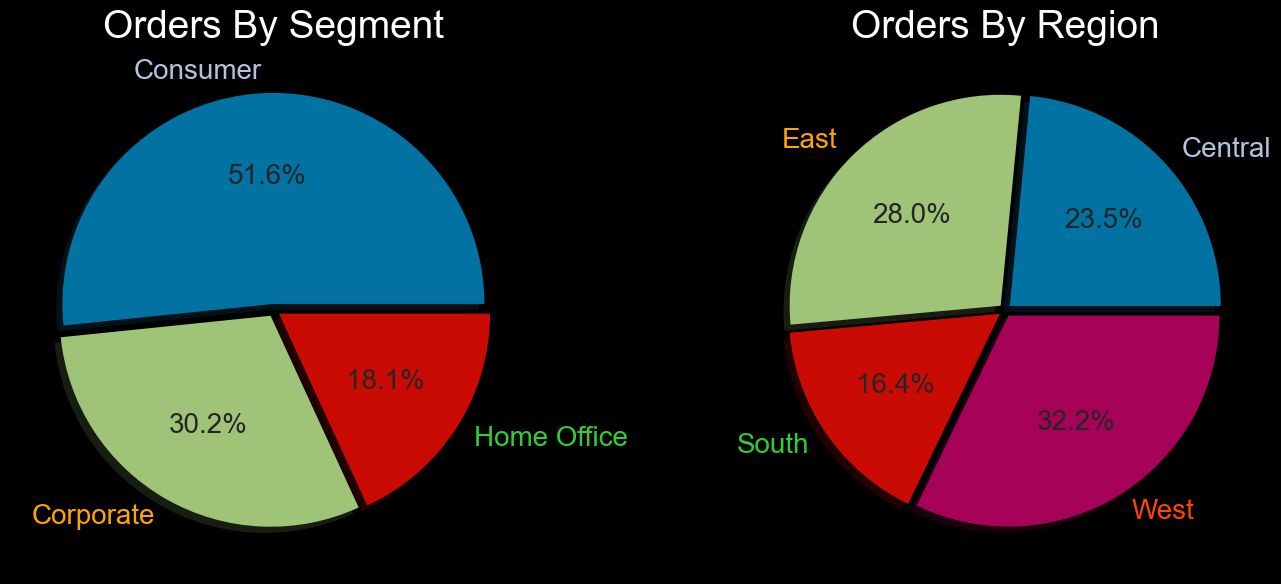

In [130]:
val = data.groupby('Segment')['Order ID'].nunique() # data.Segment.value_counts()
labels = ['Consumer','Corporate','Home Office']
colorlist = ['lightsteelblue','orange','limegreen']

val2 = data.groupby('Region')['Order ID'].nunique()
labels2 = ['Central','East','South','West']
colorlist2 = ['lightsteelblue','orange','limegreen','orangered']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))

# Plot #1
wedges,texts,auto = ax1.pie(val,labels=labels,autopct="%1.1f%%",textprops={'fontsize':20},
                                           shadow=True,explode=(0.03,0.03,0.03))
ax1.set_title('Orders By Segment',color='white',fontsize=28)
for text,color in zip(texts,colorlist):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')

# Plot #2
wedges,texts,auto = ax2.pie(val2,labels=labels2,autopct="%1.1f%%",textprops={'fontsize':20},
                                           shadow=True,explode=(0.03,0.03,0.03,0.03))
ax2.set_title('Orders By Region',color='white',fontsize=28)
for text,color in zip(texts,colorlist2):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')


plt.tight_layout()
plt.show()

In [131]:
segment_by_region = data.groupby(['Segment','Region'])['Quantity'].sum().reset_index(name='items sold').sort_values(['Segment','items sold'],ascending=False)

segment_by_region['items sold'].sum(), data['Quantity'].sum()

(37873, 37873)

In [132]:
segment_by_region['All'] = 'All'

fig = px.treemap(segment_by_region,path=['All','Segment','Region'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Segment and Region',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

**Sales and Profits by Segment**

I want to have a look at the sales and profits by segment (consumer, corporate or home office).

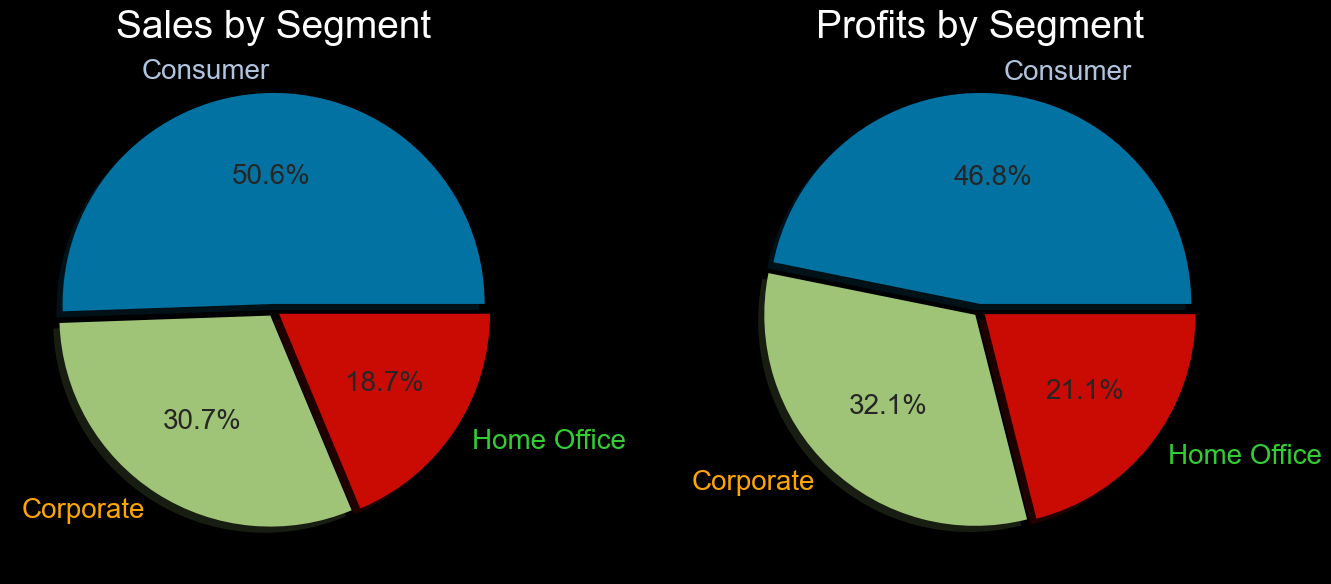

In [133]:
val = data.groupby('Segment')['Sales'].sum()
labels = ['Consumer','Corporate','Home Office']
colorlist = ['lightsteelblue','orange','limegreen']

val2 = data.groupby('Segment')['Profit'].sum()
labels2 = ['Consumer','Corporate','Home Office']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))

# Plot #1
wedges,texts,auto = ax1.pie(val,labels=labels,autopct="%1.1f%%",textprops={'fontsize':20},
                                           shadow=True,explode=(0.03,0.03,0.03))
ax1.set_title('Sales by Segment',color='white',fontsize=28)
for text,color in zip(texts,colorlist):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')

# Plot #2
wedges,texts,auto = ax2.pie(val2,labels=labels2,autopct="%1.1f%%",textprops={'fontsize':20},
                                           shadow=True,explode=(0.03,0.03,0.03))
ax2.set_title('Profits by Segment',color='white',fontsize=28)
for text,color in zip(texts,colorlist):
    text.set_color(color)
    text.set_size(20)

fig.set_facecolor('black')


plt.tight_layout()
plt.show()

Around half of the sales and profits are due to consumers. The other half is given by corporate and home office sales.

<h3>4.2 Best and Worst Customers</h3>

Let's have a look at the customers who provided the highest profits and losses.

In [134]:
profits_by_customer = data.groupby('Customer ID')['Profit'].sum().reset_index(name='profits')

best_customers  = (profits_by_customer.sort_values(['profits'],ascending=False)).head(10)
worst_customers = (profits_by_customer.sort_values(['profits'],ascending=True)).head(10)

# Check
profits_by_customer['profits'].sum(), data['Profit'].sum()

(286397.02170000004, 286397.0217)

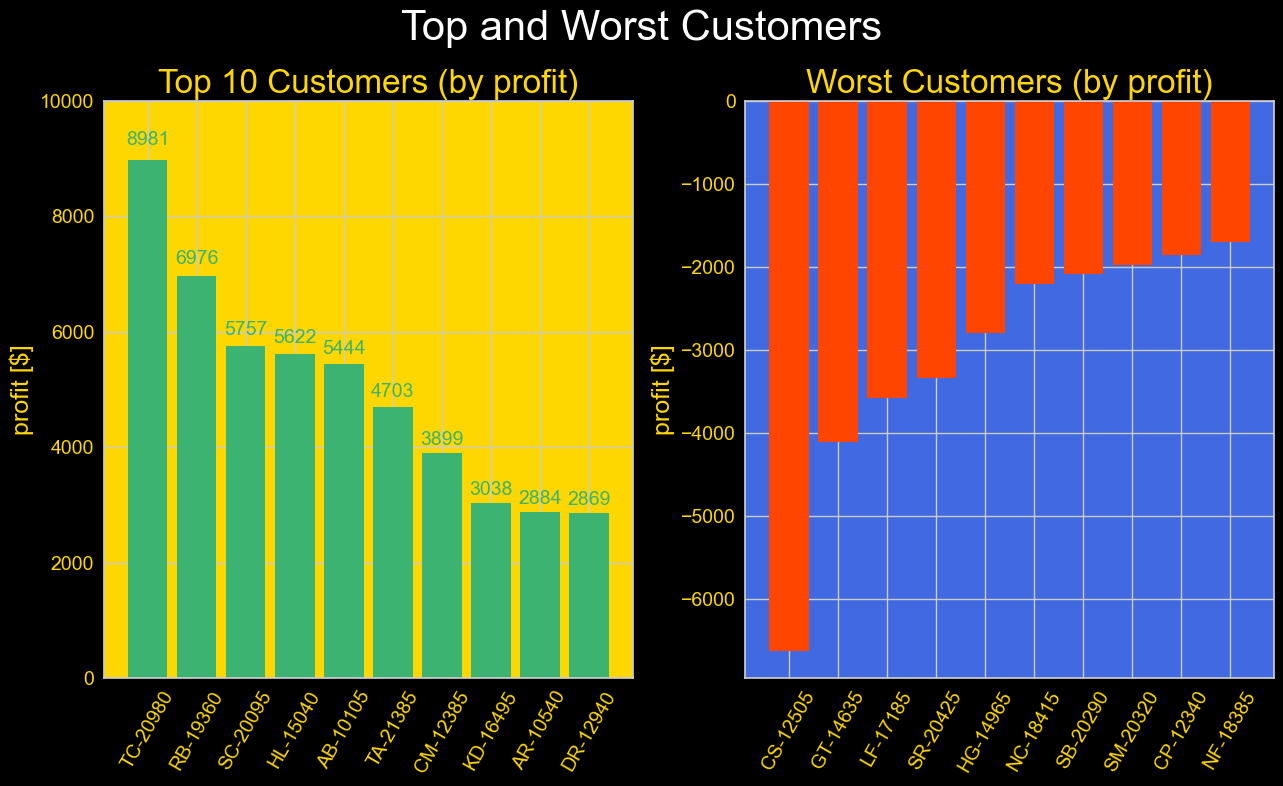

In [136]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,8))

### Plot #1 ###
fig1 = ax1.bar(best_customers['Customer ID'],best_customers['profits'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,10000])
ax1.set_title('Top 10 Customers (by profit)',fontsize=24,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('profit [$]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=60)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',14)

### Plot #2 ###
fig2 = ax2.bar(worst_customers['Customer ID'],worst_customers['profits'],color='orangered',linewidth=3)
#ax2.set_ylim([-60,15])
ax2.set_title('Worst Customers (by profit)',fontsize=24,color='gold')
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('profit [$]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
#autolabel(fig2,ax2,'orangered',16)

fig.suptitle("Top and Worst Customers",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

Then, I am plotting the cumulative sums of sales and profits.

In [137]:
total_profits = data['Profit'].sum()
cumulative_profits = (data.groupby('Customer ID')['Profit'].sum().sort_values(ascending=False)) / total_profits

total_sales = data['Sales'].sum()
cumulative_sales = (data.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)) / total_sales

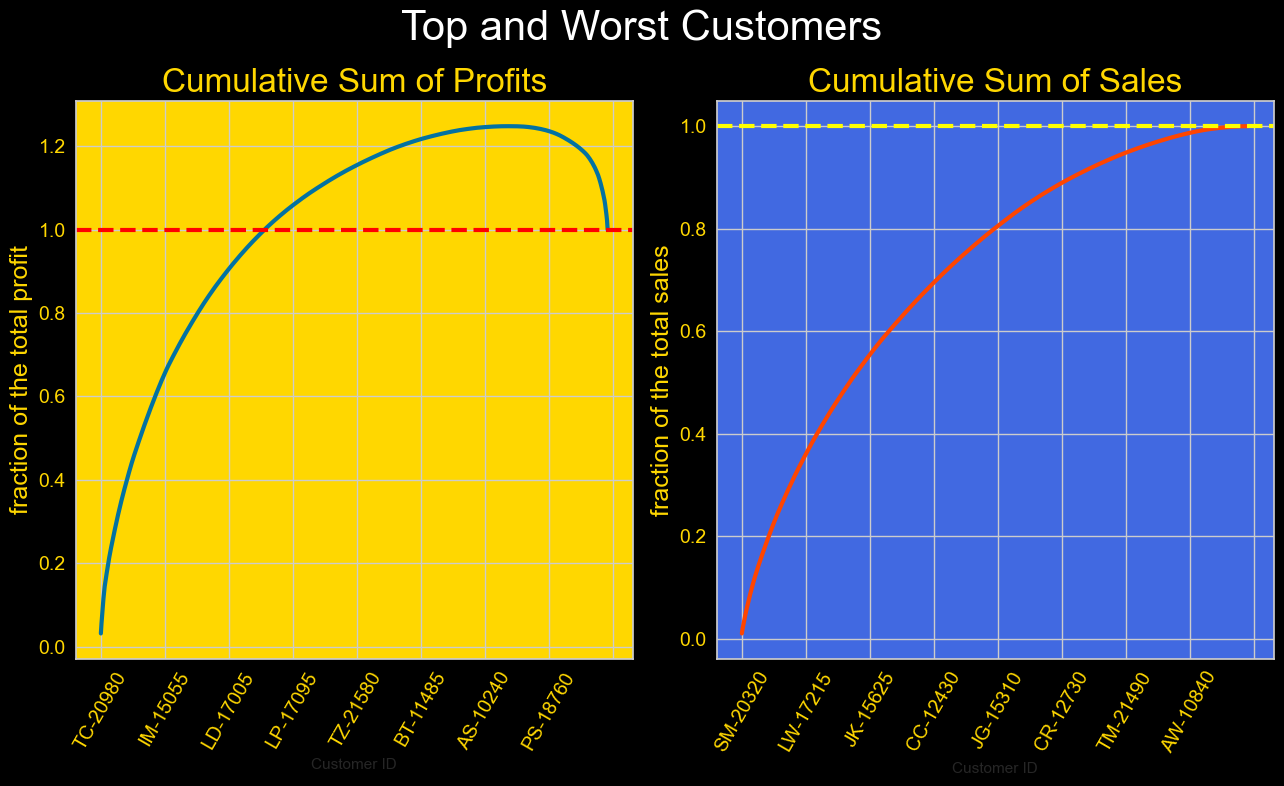

In [146]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,8))

### Plot #1 ###
fig1 = cumulative_profits.cumsum().plot(ax=ax1,linewidth=3)
ax1.axhline(y=1,color='red',linestyle='dashed',linewidth=3)
ax1.set_title('Cumulative Sum of Profits',fontsize=24,color='gold')
ax1.xaxis.set_tick_params(labelsize=15,color='gold')
ax1.yaxis.set_tick_params(labelsize=15,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=15,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_ylabel('fraction of the total profit',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=60)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')

### Plot #2 ###
fig2 = cumulative_sales.cumsum().plot(ax=ax2,color='orangered',linewidth=3)
ax2.axhline(y=1,color='yellow',linestyle='dashed',linewidth=3)
ax2.set_title('Cumulative Sum of Sales',fontsize=24,color='gold')
ax2.xaxis.set_tick_params(labelsize=15,color='gold')
ax2.yaxis.set_tick_params(labelsize=15,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=15,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_ylabel('fraction of the total sales',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')

fig.suptitle("Top and Worst Customers",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

One can notice that:
- The profit curve grows much faster in its first part. This means that there are customers that grant higher profits with respect to all the others.
- The profit curve grows larger than 1 (100% of the profit, red-dashed line) and then it goes back to 1. This is because there are many customers that provide negative profits and they are all in the second part of the curve.

<h1>5. Cluster Analysis and Customer Personas</h1>

<h3>5.1 Introducing a New Feature (Customer Recency) and Dropping Some Columns</h3>

I am introducing a new feature (*customer recency*), that can help in the clustering process.

The first step is to get the minimum and maximum 'dates' in the dataset.

In [147]:
min_date = min(data['Order Date'])
max_date = max(data['Order Date'])

min_date, max_date

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Then, I am defining for each customer the *last purchase date* and the *customer recency* (i.e. the number of days before the last purchase).

In [148]:
data['Last Purchase Date'] = data.groupby('Customer ID')['Order Date'].transform(max)
data['Last Purchase Date'] = pd.to_datetime(data['Last Purchase Date']) # .dt.date

data["Customer Recency"] = (data["Order Date"] - data["Last Purchase Date"]).dt.days

Finally, I am dropping some columns that might be unnecessary in the cluster analysis.

In [149]:
customer_data = data.copy()

customer_data.drop(['Order ID','Order Date','Ship Date','Product Name','year','month',
                    'day','order ship time','Last Purchase Date','Sub-Category'],
                  axis=1,inplace=True)

customer_data.head()

Ship Mode Customer ID    Segment             City       State Region  \
0    Second Class    CG-12520   Consumer        Henderson    Kentucky  South   
1    Second Class    CG-12520   Consumer        Henderson    Kentucky  South   
2    Second Class    DV-13045  Corporate      Los Angeles  California   West   
3  Standard Class    SO-20335   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class    SO-20335   Consumer  Fort Lauderdale     Florida  South   

          Category     Sales  Quantity  Discount    Profit  Customer Recency  
0        Furniture  261.9600         2      0.00   41.9136               -79  
1        Furniture  731.9400         3      0.00  219.5820               -79  
2  Office Supplies   14.6200         2      0.00    6.8714              -547  
3        Furniture  957.5775         5      0.45 -383.0310              -782  
4  Office Supplies   22.3680         2      0.20    2.5164              -782

<h3>5.2 K-Means Method</h3>

##### 5.2.1 Label Encoding and Scaling

In [150]:
### Label encoding ###
LABELS = customer_data.columns

encoder = LabelEncoder()

for col in LABELS:
    # Check if object
    if customer_data[col].dtype == 'O':
        # Fit label encoder and return encoded labels
        customer_data[col] = encoder.fit_transform(customer_data[col])

In [151]:
### Scaling ###
mm_scaler = MinMaxScaler()

# Apply Min-Max Scaling
customer_data[LABELS] = mm_scaler.fit_transform(customer_data[LABELS])

customer_data.head()

Ship Mode  Customer ID  Segment      City     State    Region  Category  \
0   0.666667     0.180556      0.0  0.366038  0.312500  0.666667       0.0   
1   0.666667     0.180556      0.0  0.366038  0.312500  0.666667       0.0   
2   0.666667     0.299242      0.5  0.501887  0.062500  1.000000       0.5   
3   1.000000     0.890152      0.0  0.288679  0.166667  0.666667       0.0   
4   1.000000     0.890152      0.0  0.288679  0.166667  0.666667       0.5   

      Sales  Quantity  Discount    Profit  Customer Recency  
0  0.011552  0.076923    0.0000  0.442794          0.945139  
1  0.032313  0.153846    0.0000  0.454639          0.945139  
2  0.000626  0.076923    0.0000  0.440458          0.620139  
3  0.042280  0.307692    0.5625  0.414464          0.456944  
4  0.000968  0.076923    0.2500  0.440168          0.456944

#### 5.2.2 Dimensionality Reduction (with PCA)

[ 20.48  35.6   49.57  59.92  68.74  77.29  85.57  91.89  96.87  99.9
  99.98 100.  ]


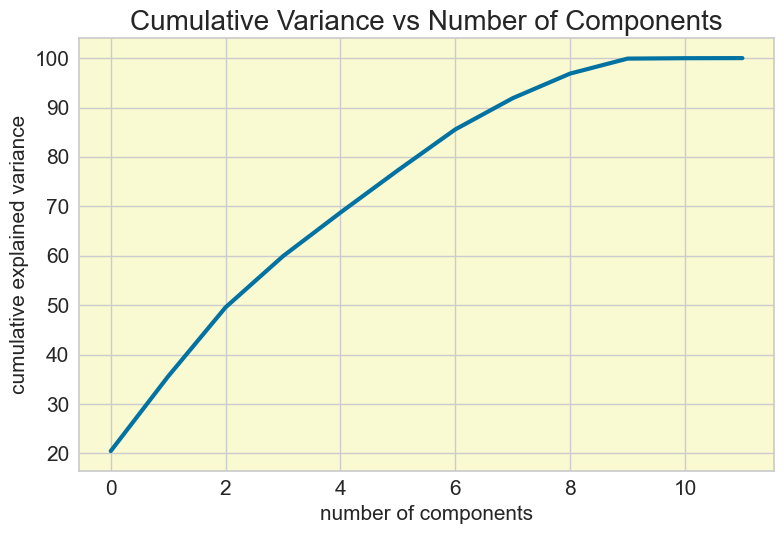

In [152]:
pca = PCA(n_components=12)
pca.fit(customer_data)

# The amount of variance that each Principle Component explains
var = pca.explained_variance_ratio_

# Cumulative Variance explains
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var)

plt.plot(var,linewidth=3)
plt.xlabel('number of components',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('cumulative explained variance',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Cumulative Variance vs Number of Components',fontsize=20) #,color='white')

plt.tight_layout()
plt.gca().set_facecolor('lightgoldenrodyellow')
plt.show()

Considering N = 8 dimensions, I can explain more than 90% of the total variance.

In [153]:
# Initiating PCA to reduce dimentions to 8
pca = PCA(n_components=8)
pca.fit(customer_data)
PCA_CD = pd.DataFrame(pca.transform(customer_data),columns=(["col1","col2","col3","col4","col5",
                                                    "col6","col7","col8"]))
PCA_CD.describe().T

count          mean       std       min       25%       50%       75%  \
col1  9994.0  4.408010e-17  0.444549 -0.903361 -0.329589 -0.116388  0.377668   
col2  9994.0 -4.585752e-17  0.381948 -0.413742 -0.333128 -0.246243  0.193531   
col3  9994.0 -3.249130e-16  0.367224 -0.869915 -0.116751  0.205509  0.261553   
col4  9994.0  9.278150e-17  0.316061 -0.645682 -0.074924  0.017693  0.067085   
col5  9994.0  5.350044e-17  0.291696 -0.819667 -0.212613 -0.004694  0.207502   
col6  9994.0  1.519697e-17  0.287261 -0.853800 -0.197328 -0.005159  0.186894   
col7  9994.0 -1.777423e-17  0.282764 -0.948072 -0.197118  0.018160  0.210880   
col8  9994.0  5.687755e-17  0.247049 -0.501914 -0.163799 -0.038325  0.115867   

           max  
col1  0.741287  
col2  0.778568  
col3  0.406096  
col4  0.611777  
col5  0.919584  
col6  0.913895  
col7  0.744038  
col8  0.858639

#### 5.2.3 Clustering

Now, I will define the clusters of customers by using the 'k-means' algorithm. To decide the proper number of clusters, I will first make use of the **elbow method**.

In [154]:
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    # k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(PCA_CD)
    inertia.append(kmeans.inertia_)

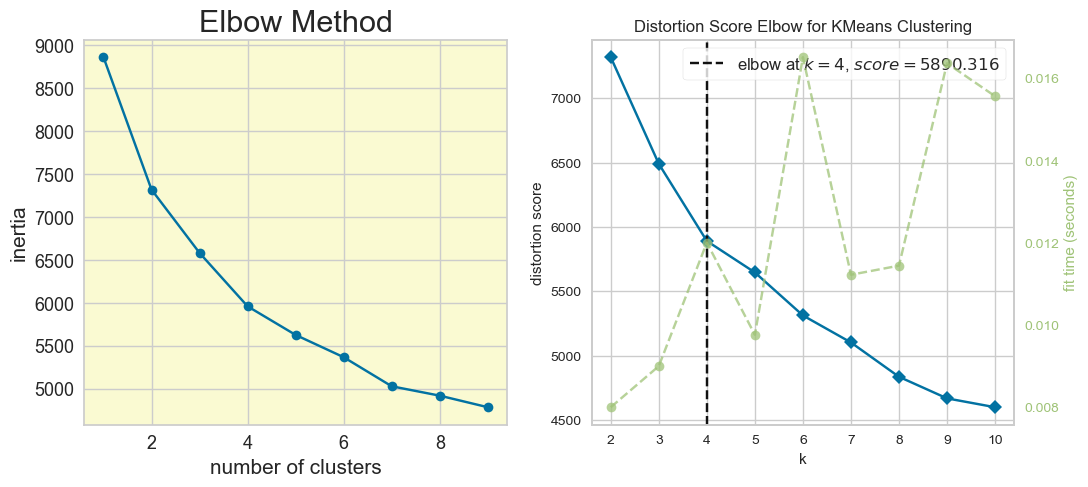

<Figure size 800x550 with 0 Axes>

In [155]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# First Plot
ax1.plot(range(1,10),inertia,marker='o',linestyle='-')
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax1.set_facecolor('lightgoldenrodyellow')
ax1.set_xlabel("number of clusters",fontsize=15)
ax1.set_ylabel('inertia',fontsize=15)
ax1.set_title("Elbow Method",fontsize=22)

# Second Plot
Elbow_M = KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(PCA_CD)
ax2 = Elbow_M.show()

plt.tight_layout()

According to the elbow method, the best number of clusters is n = 5.

I am calculating the **silhouette score**.

In [156]:
silhouette_scores = []

range_clusters = range(2,11)
for i in range_clusters:
    kmeans = KMeans(n_clusters=i,random_state=0)
    labels = kmeans.fit_predict(PCA_CD)
    score = silhouette_score(PCA_CD,labels)
    silhouette_scores.append(score)

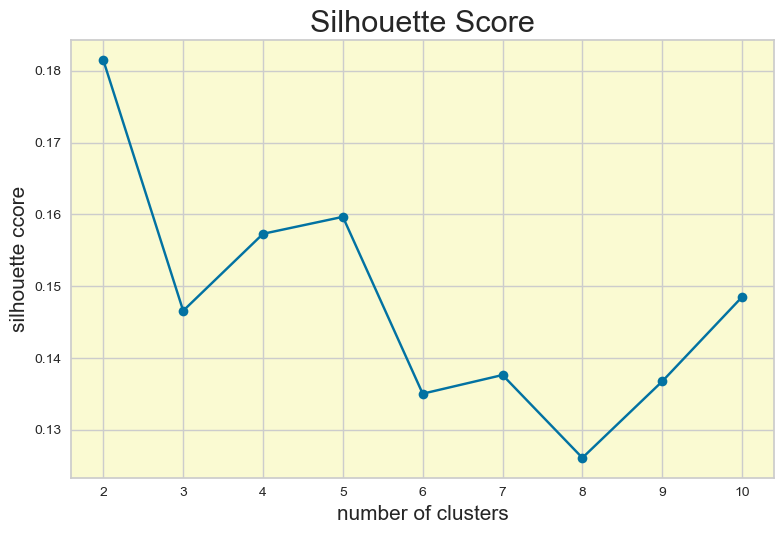

In [157]:
plt.plot(range_clusters,silhouette_scores,marker='o')
plt.xlabel("number of clusters",fontsize=15)
plt.ylabel('silhouette ccore',fontsize=15)
plt.title("Silhouette Score",fontsize=22)

plt.tight_layout()
plt.gca().set_facecolor('lightgoldenrodyellow')
plt.show()

The silhouette score is higher for $n_{\rm clusters}$ = 3.

Then, I will perform a silhouette analysis.

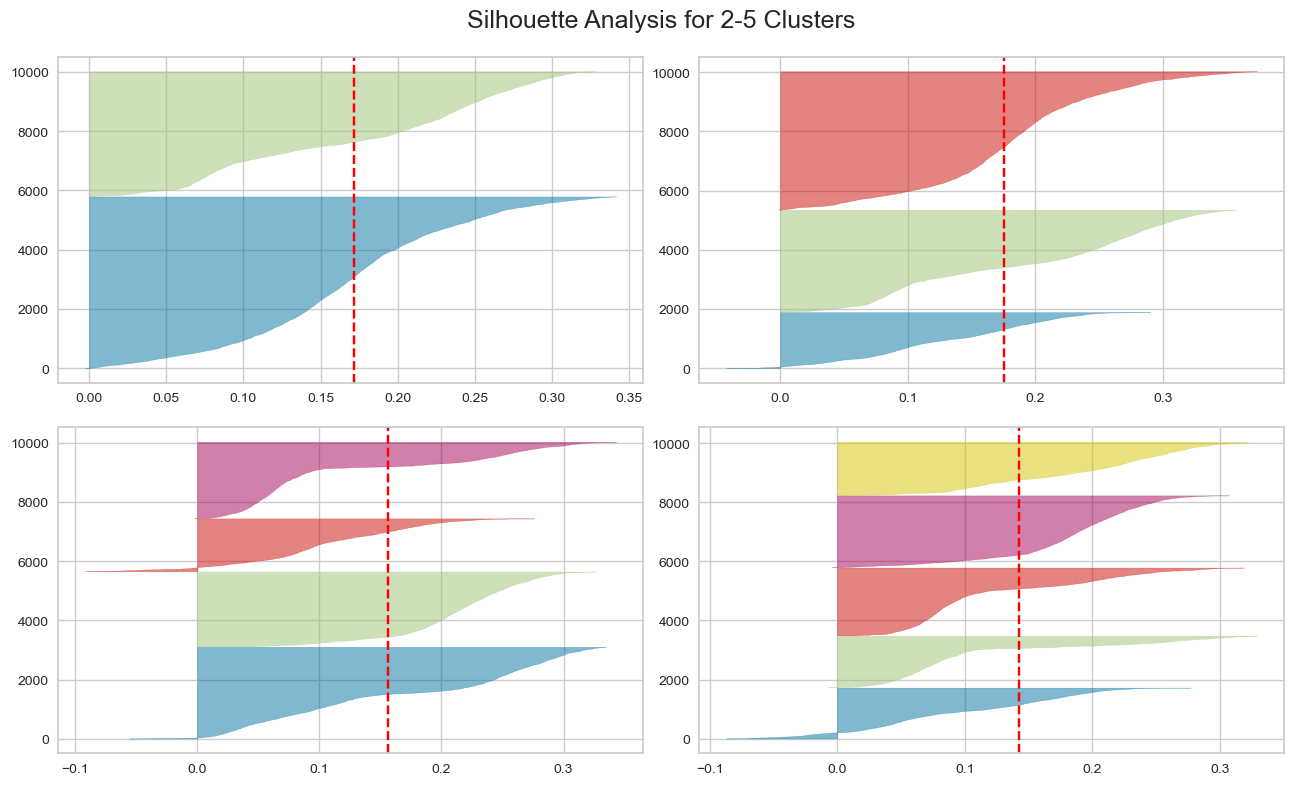

In [158]:
fig,ax = plt.subplots(2,2,figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-5 Clusters',size=18)
plt.tight_layout()

for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=100,random_state=42)
    q,mod = divmod(i,2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(PCA_CD)

One can notice that:
- There is presence of clusters with below average silhouette scores for 2 and 5-cluster cases.
- Accoring to these plots, one should choose between the 3 and 4-cluster cases.
- If we combine these results with those of the previous plot, we can conclude that the most favorable case is that of $n_{\rm clusters}$ = 3.

Finally, I will calculate the **Davies-Bouldin score**.

In [159]:
davies_bouldin_scores = []

for i in range_clusters:
    kmeans = KMeans(n_clusters=i,random_state=0)
    labels = kmeans.fit_predict(PCA_CD)
    score = davies_bouldin_score(PCA_CD,labels)
    davies_bouldin_scores.append(score)

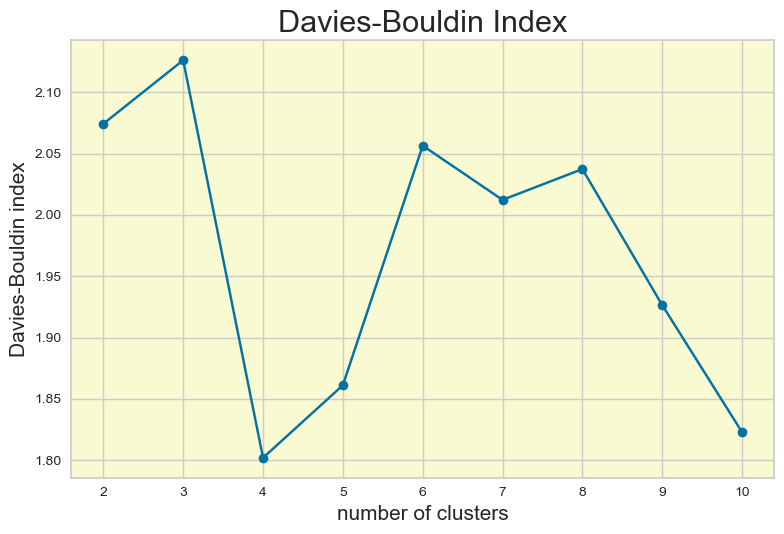

In [160]:
plt.plot(range_clusters,davies_bouldin_scores,marker='o')
plt.xlabel("number of clusters",fontsize=15)
plt.ylabel('Davies-Bouldin index',fontsize=15)
plt.title("Davies-Bouldin Index",fontsize=22)

plt.tight_layout()
plt.gca().set_facecolor('lightgoldenrodyellow')
plt.show()

For $n_{\rm clusters}$ < 8, the plot shows that the lowest Davies-Bouldin value occurs at 4 clusters, suggesting that the optimal number of clusters is four.

In conclusion, based on the results of the elbow method, the silhouette score and the Davies-Bouldin index, **the optimal number of clusters is between 3 and 5.**

#### 5.2.4 Agglomerative Clustering model

In [161]:
# Initiating the Agglomerative Clustering model. n_clusters = 3, Euclidean metric case
AC = AgglomerativeClustering(n_clusters=3)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_CD)
PCA_CD["Clusters 3"] = yhat_AC

# Adding the Clusters feature to the original and scaled dataframes
data["Clusters 3"] = yhat_AC
customer_data["Clusters 3"] = yhat_AC

In [162]:
# Initiating the Agglomerative Clustering model. n_clusters = 4, Euclidean metric case
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_CD)
PCA_CD["Clusters 4"] = yhat_AC

# Adding the Clusters feature to the original and scaled dataframes
data["Clusters 4"] = yhat_AC
customer_data["Clusters 4"] = yhat_AC

Also the original dataframe has new 'Clusters 3' and 'Clusters 4' features.

**Group Distribution of Clusters**

We want to see how the clusters' populations are (numerically) distributed.

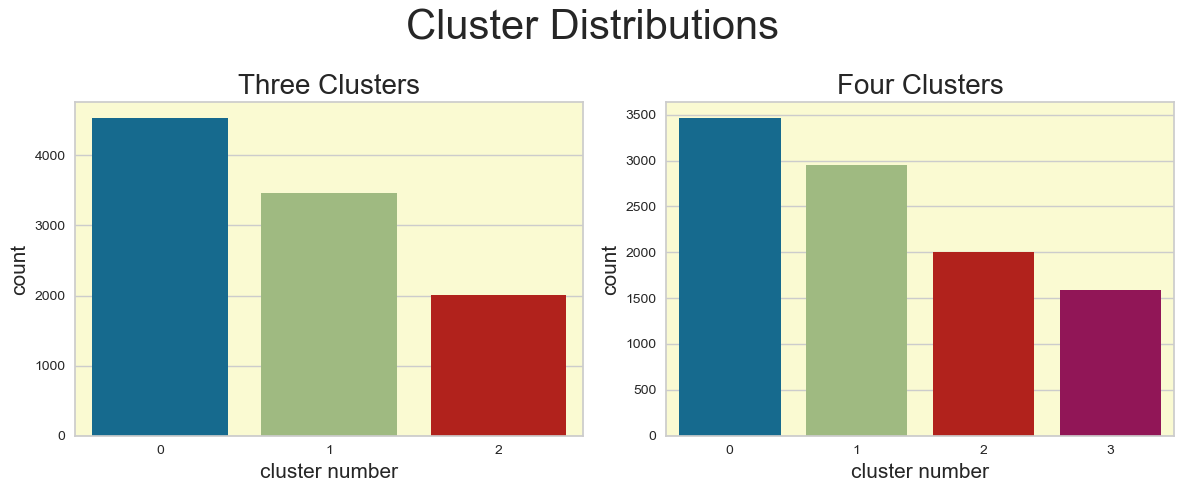

In [163]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# First Plot
ax1 = sns.countplot(x=data["Clusters 3"],ax=ax1)
ax1.set_facecolor('lightgoldenrodyellow')
ax1.set_xlabel("cluster number",fontsize=15)
ax1.set_ylabel('count',fontsize=15)
ax1.set_title("Three Clusters",fontsize=20)

# Second Plot
ax2 = sns.countplot(x=data["Clusters 4"],ax=ax2)
ax2.set_facecolor('lightgoldenrodyellow')
ax2.set_xlabel("cluster number",fontsize=15)
ax2.set_ylabel('count',fontsize=15)
ax2.set_title("Four Clusters",fontsize=20)

fig.suptitle("Cluster Distributions",fontsize=30)

plt.tight_layout()

#### 5.2.5 First Case: Three Clusters

Now, I am having a look at the distributions of the variables by cluster content.

In [164]:
avg_sales_clusters = data.groupby('Clusters 3')['Sales'].mean().reset_index(name='average sales').sort_values(['average sales'],ascending=False)

avg_profit_clusters = data.groupby('Clusters 3')['Profit'].mean().reset_index(name='average profit').sort_values(['average profit'],ascending=False)

avg_discount_clusters = (data.groupby('Clusters 3')['Discount'].mean() * 100).reset_index(name='average discount').sort_values(['average discount'],ascending=False)

avg_discount_clusters

Clusters 3  average discount
0           0         19.162878
2           2         16.232268
1           1         10.628431

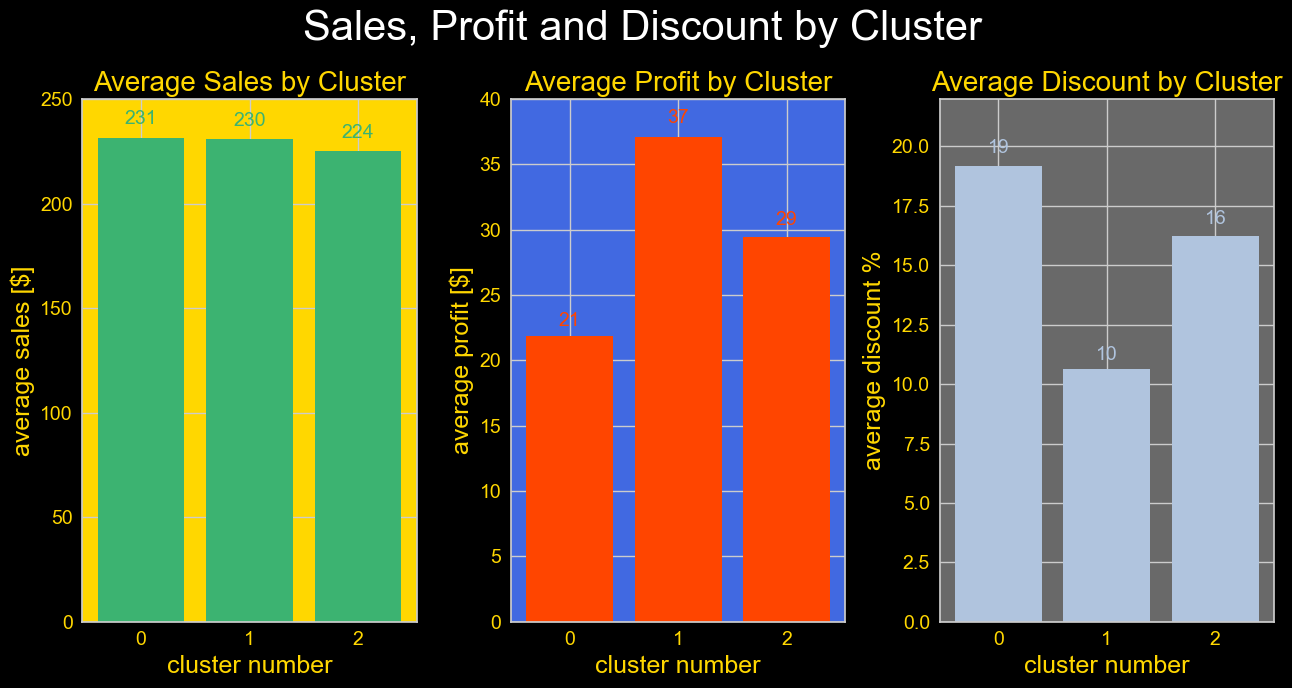

In [165]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(13,7))

### Plot #1 ###
fig1 = ax1.bar(avg_sales_clusters['Clusters 3'],avg_sales_clusters['average sales'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,250])
ax1.set_title('Average Sales by Cluster',fontsize=20,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_xlabel('cluster number',fontsize=18,color='gold')
ax1.set_ylabel('average sales [$]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',14)

### Plot #2 ###
fig2 = ax2.bar(avg_profit_clusters['Clusters 3'],avg_profit_clusters['average profit'],linewidth=3,color='orangered')
ax2.set_ylim([0,40])
ax2.set_title('Average Profit by Cluster',fontsize=20,color='gold')
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_xlabel('cluster number',fontsize=18,color='gold')
ax2.set_ylabel('average profit [$]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',14)

### Plot #3 ###
fig3 = ax3.bar(avg_discount_clusters['Clusters 3'],avg_discount_clusters['average discount'],linewidth=3,color='lightsteelblue')
ax3.set_ylim([0,22])
ax3.set_title('Average Discount by Cluster',fontsize=20,color='gold')
ax3.xaxis.set_tick_params(labelsize=13,color='gold')
ax3.yaxis.set_tick_params(labelsize=13,color='gold')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=12,color='gold')
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=10,color='gold')
ax3.set_xlabel('cluster number',fontsize=18,color='gold')
ax3.set_ylabel('average discount %',fontsize=18,color='gold')
ax3.yaxis.set_tick_params(labelsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.set_facecolor('dimgrey')
autolabel(fig3,ax3,'lightsteelblue',14)

fig.suptitle("Sales, Profit and Discount by Cluster",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

One can notice that:
- The average sales are almost the same within the three clusters.
- On the contrary, in the case of profit there is a clear difference between the three clusters.
- The clear difference between clusters appears in the discount case too.

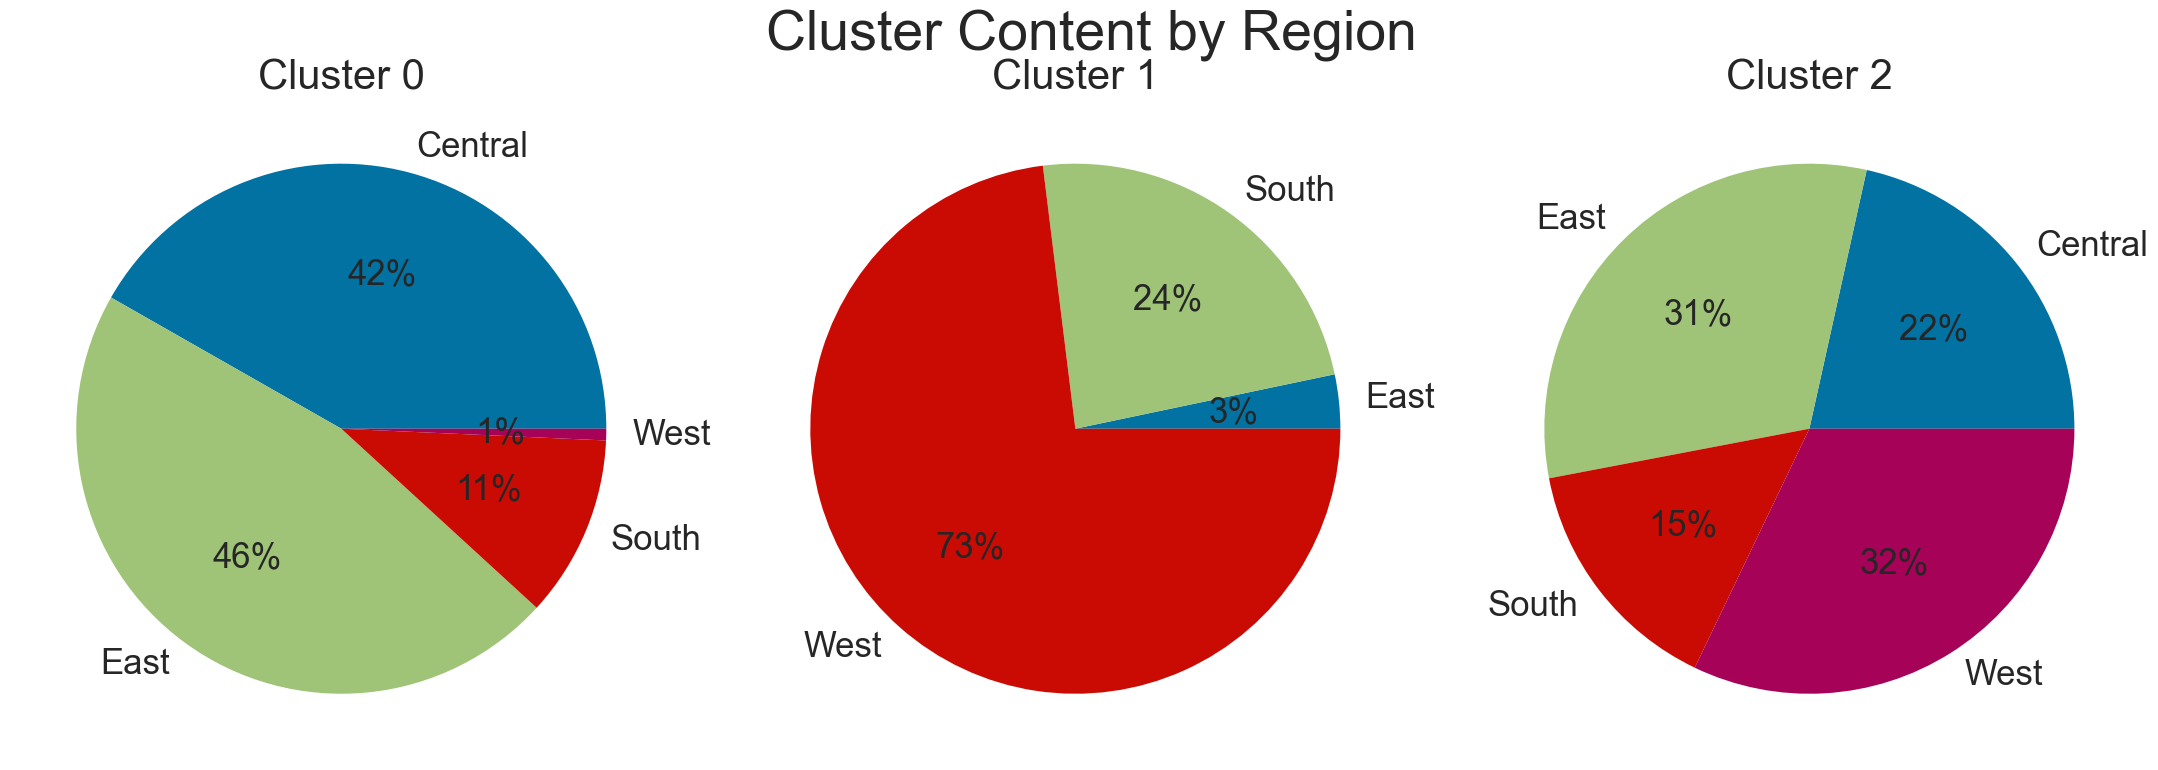

In [166]:
def label_function(val):
    return f'{val:.0f}%'

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(22,8))

data[data['Clusters 3'] == 0].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':25},ax=ax1)
data[data['Clusters 3'] == 1].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':25},ax=ax2)
data[data['Clusters 3'] == 2].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':25},ax=ax3)

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)

fig.suptitle("Cluster Content by Region",fontsize=40)
plt.tight_layout()

plt.show()

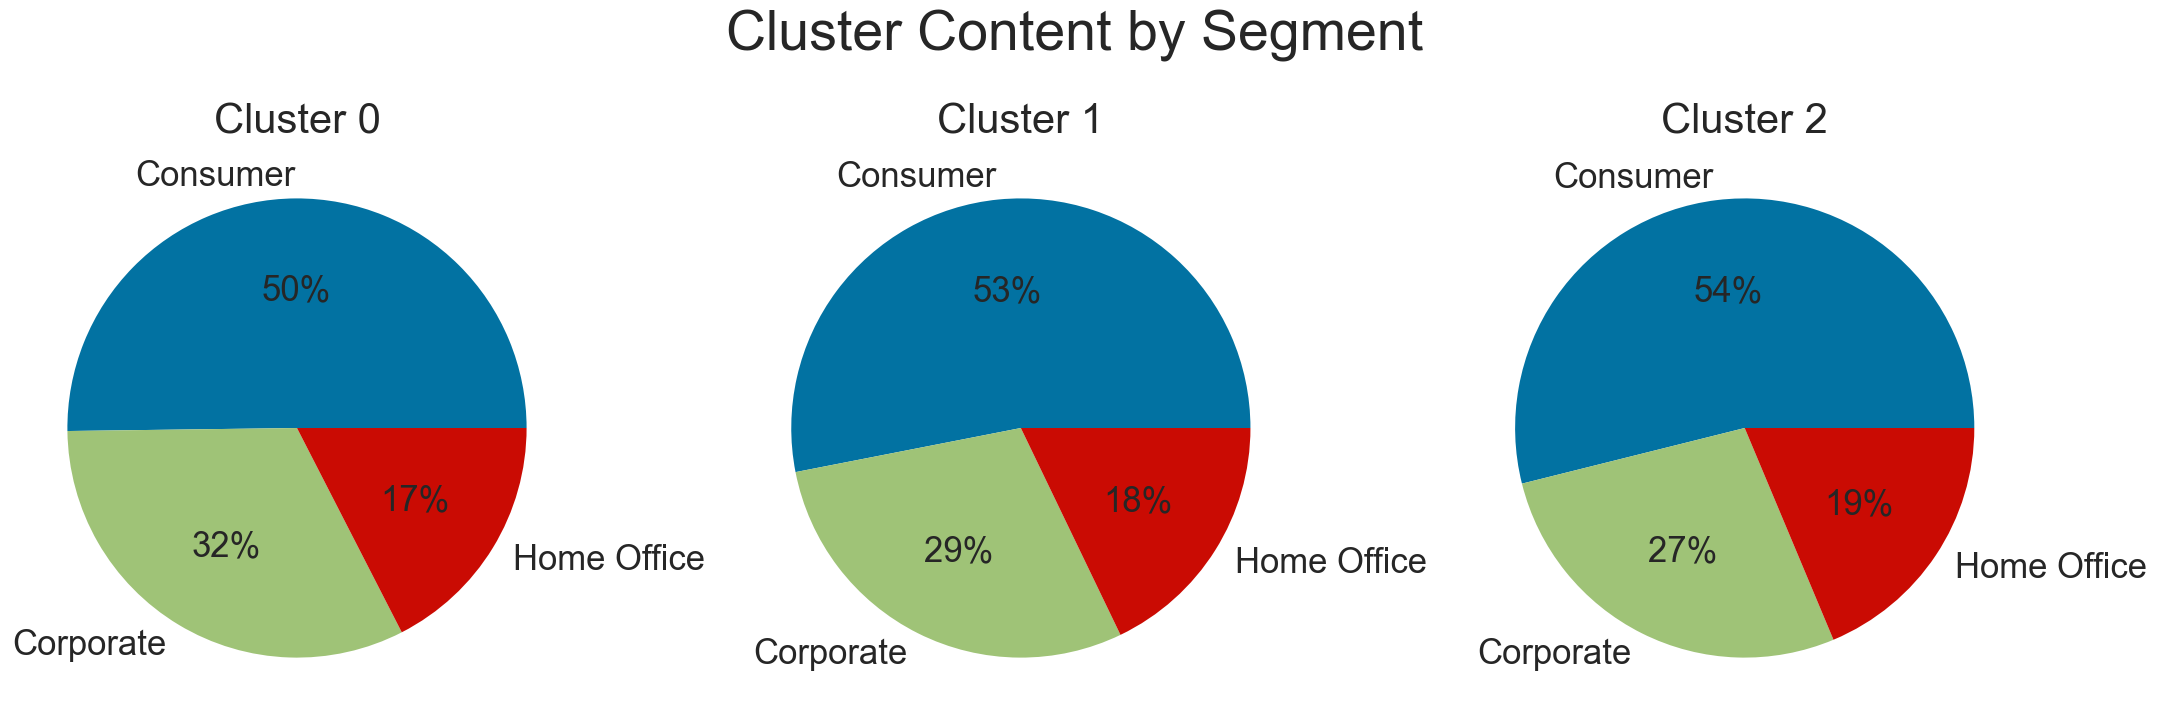

In [167]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(22,8))

data[data['Clusters 3'] == 0].groupby('Segment').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':25},ax=ax1)
data[data['Clusters 3'] == 1].groupby('Segment').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':25},ax=ax2)
data[data['Clusters 3'] == 2].groupby('Segment').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':25},ax=ax3)

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)

fig.suptitle("Cluster Content by Segment",fontsize=40)
plt.tight_layout()

plt.show()

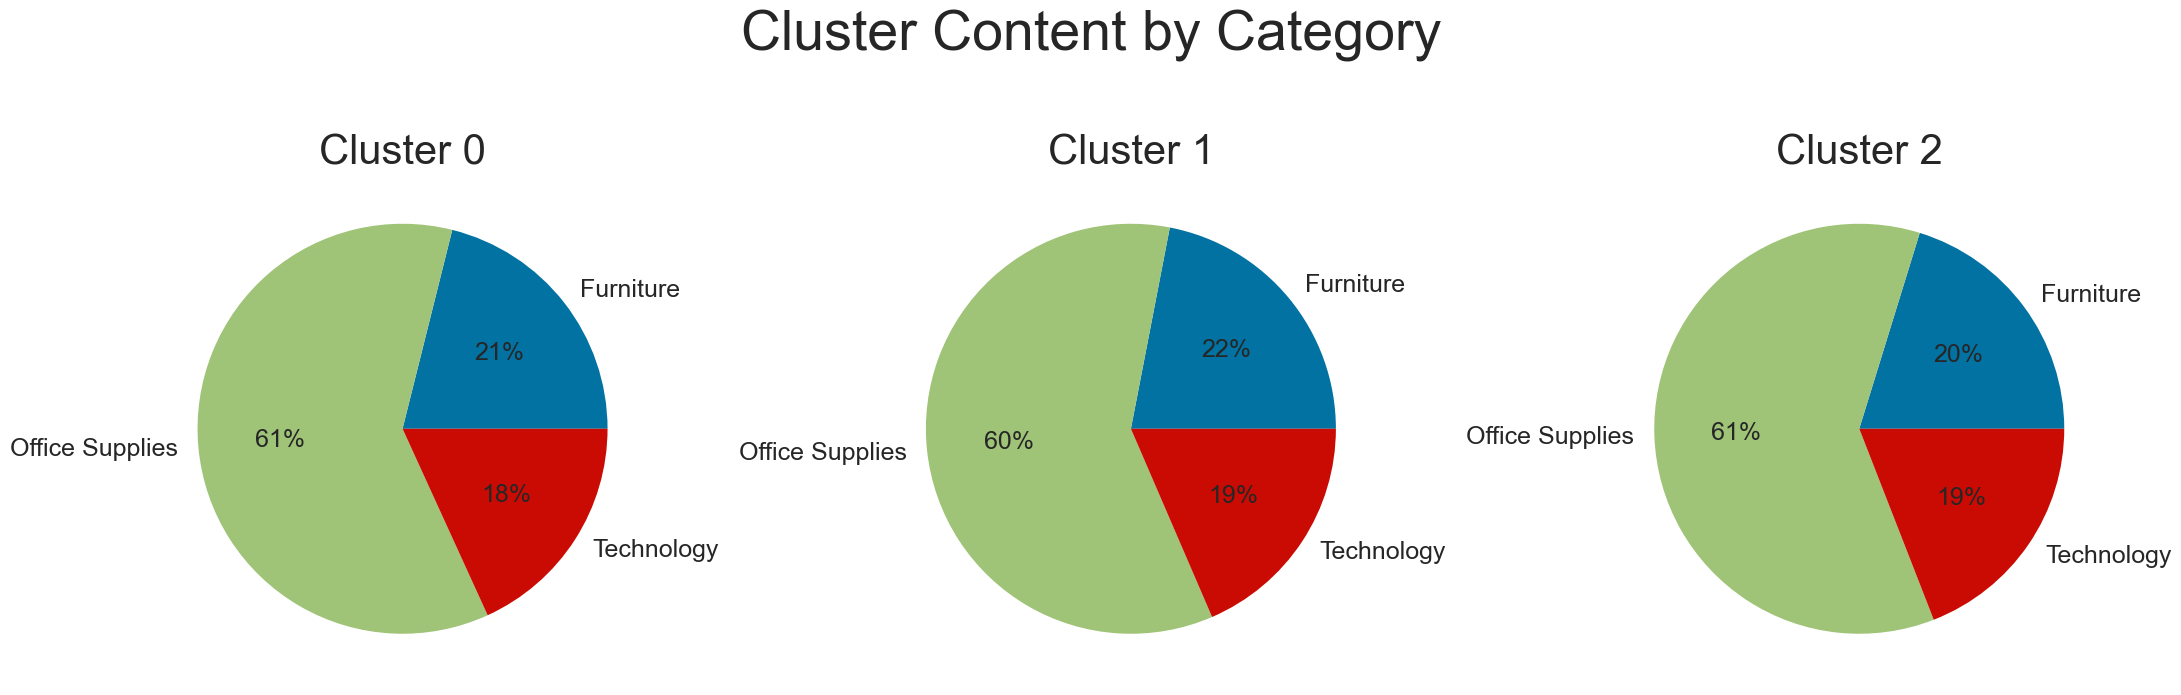

In [168]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(22,8))

data[data['Clusters 3'] == 0].groupby('Category').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':18},ax=ax1)
data[data['Clusters 3'] == 1].groupby('Category').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':18},ax=ax2)
data[data['Clusters 3'] == 2].groupby('Category').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':18},ax=ax3)

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)

fig.suptitle("Cluster Content by Category",fontsize=40)
plt.tight_layout()

plt.show()

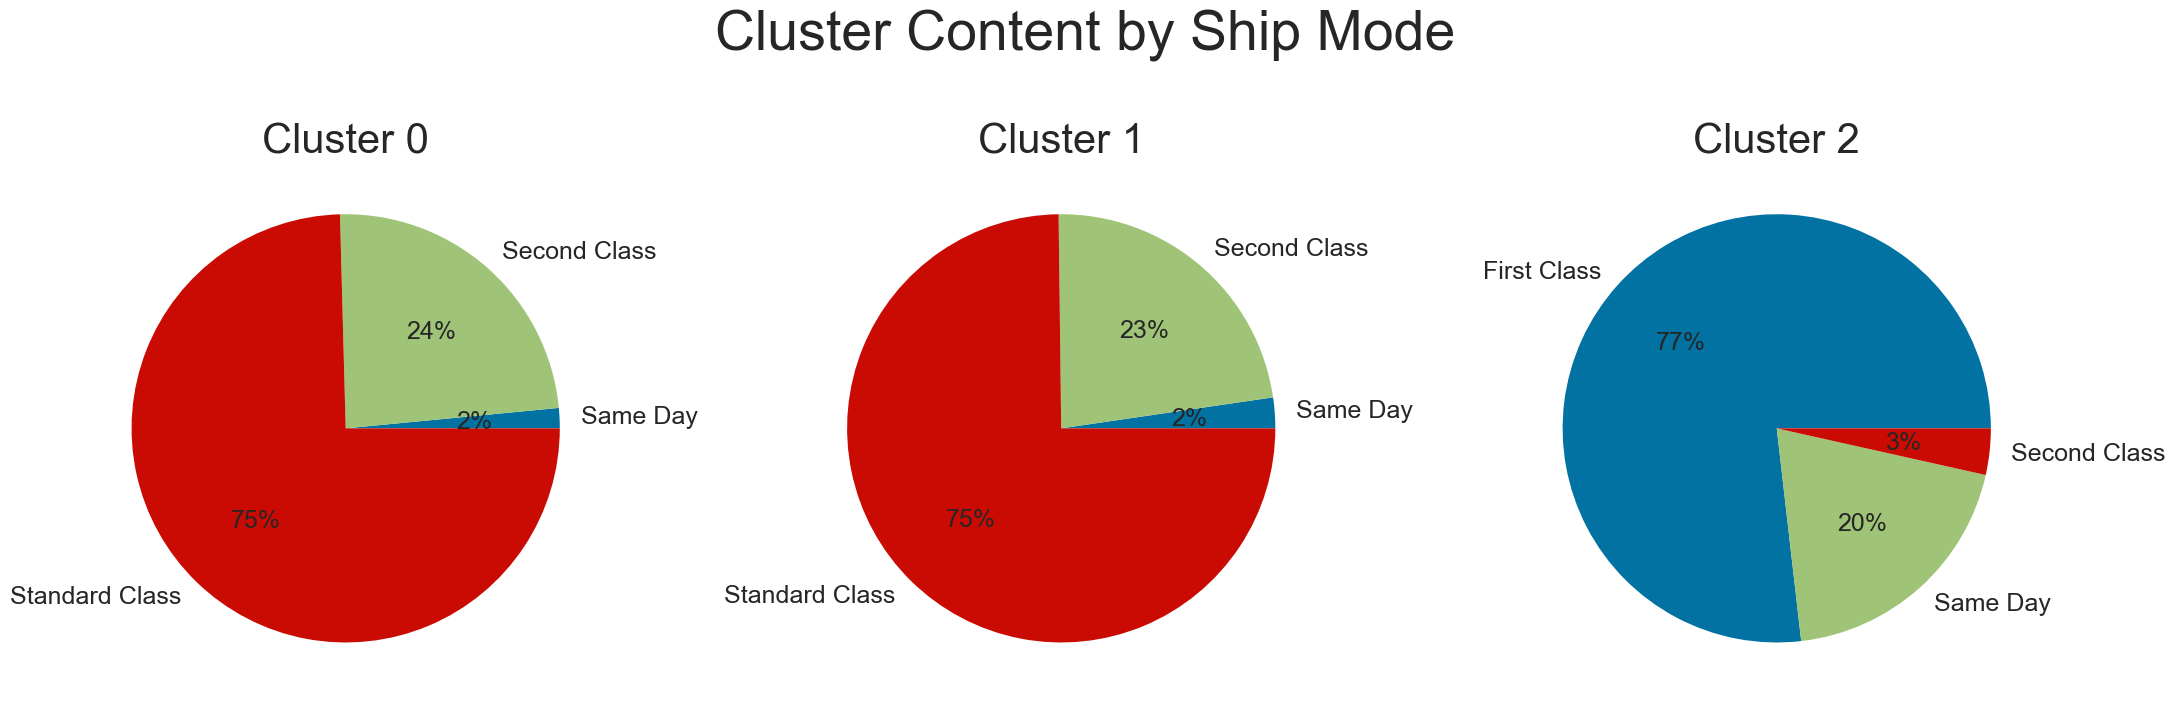

In [169]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(22,8))

data[data['Clusters 3'] == 0].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':18},ax=ax1)
data[data['Clusters 3'] == 1].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':18},ax=ax2)
data[data['Clusters 3'] == 2].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':18},ax=ax3)

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)

fig.suptitle("Cluster Content by Ship Mode",fontsize=40)
plt.tight_layout()

plt.show()

**Customer Personas**

I am creating a customer persona for each cluster based on the average values of the features. Customer personas are fictitious characters that embody different categories of customers.

In [170]:
table_data = [['Cluster Number','Customer Persona','Profit','Discount','Ship Mode','Region','Customer value'],
             ['Cluster 0','Greedy Albert','Low','High','Standard Class','Everywhere in the US','**'],
             ['Cluster 1','Shopaholic Carlie','High','Low','Standard Class','West','****'],
             ['Cluster 2','Average Billy','Medium','Medium','First Class','Everywhere in the US','***']]

# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data,height_constant=30)
figure.layout.width=1000

iplot(figure)

#### 5.2.6 Second Case: Four Clusters

In [171]:
avg_sales_clusters = data.groupby('Clusters 4')['Sales'].mean().reset_index(name='average sales').sort_values(['average sales'],ascending=False)

avg_profit_clusters = data.groupby('Clusters 4')['Profit'].mean().reset_index(name='average profit').sort_values(['average profit'],ascending=False)

avg_discount_clusters = (data.groupby('Clusters 4')['Discount'].mean() * 100).reset_index(name='average discount').sort_values(['average discount'],ascending=False)

avg_discount_clusters

Clusters 4  average discount
1           1         23.892433
2           2         16.232268
0           0         10.628431
3           3         10.363636

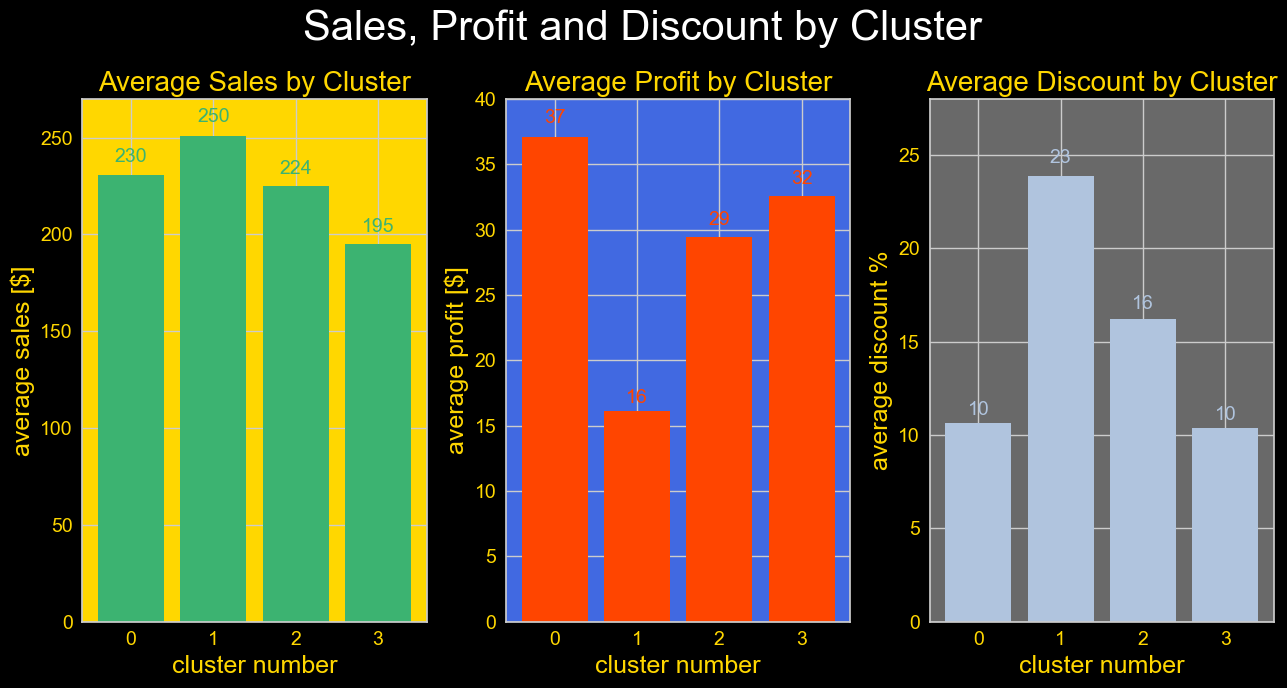

In [172]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(13,7))

### Plot #1 ###
fig1 = ax1.bar(avg_sales_clusters['Clusters 4'],avg_sales_clusters['average sales'],linewidth=3,color='mediumseagreen')
ax1.set_ylim([0,270])
ax1.set_title('Average Sales by Cluster',fontsize=20,color='gold')
ax1.xaxis.set_tick_params(labelsize=13,color='gold')
ax1.yaxis.set_tick_params(labelsize=13,color='gold')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=12,color='gold')
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=10,color='gold')
ax1.set_xlabel('cluster number',fontsize=18,color='gold')
ax1.set_ylabel('average sales [$]',fontsize=18,color='gold')
ax1.yaxis.set_tick_params(labelsize=14)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.set_facecolor('gold')
autolabel(fig1,ax1,'mediumseagreen',14)

### Plot #2 ###
fig2 = ax2.bar(avg_profit_clusters['Clusters 4'],avg_profit_clusters['average profit'],linewidth=3,color='orangered')
ax2.set_ylim([0,40])
ax2.set_title('Average Profit by Cluster',fontsize=20,color='gold')
ax2.xaxis.set_tick_params(labelsize=13,color='gold')
ax2.yaxis.set_tick_params(labelsize=13,color='gold')
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=12,color='gold')
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=10,color='gold')
ax2.set_xlabel('cluster number',fontsize=18,color='gold')
ax2.set_ylabel('average profit [$]',fontsize=18,color='gold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.set_facecolor('royalblue')
autolabel(fig2,ax2,'orangered',14)

### Plot #3 ###
fig3 = ax3.bar(avg_discount_clusters['Clusters 4'],avg_discount_clusters['average discount'],linewidth=3,color='lightsteelblue')
ax3.set_ylim([0,28])
ax3.set_title('Average Discount by Cluster',fontsize=20,color='gold')
ax3.xaxis.set_tick_params(labelsize=13,color='gold')
ax3.yaxis.set_tick_params(labelsize=13,color='gold')
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=12,color='gold')
ax3.set_yticklabels(ax3.get_yticklabels(),fontsize=10,color='gold')
ax3.set_xlabel('cluster number',fontsize=18,color='gold')
ax3.set_ylabel('average discount %',fontsize=18,color='gold')
ax3.yaxis.set_tick_params(labelsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.set_facecolor('dimgrey')
autolabel(fig3,ax3,'lightsteelblue',14)

fig.suptitle("Sales, Profit and Discount by Cluster",fontsize=30,color='white')
fig.set_facecolor('black')
plt.tight_layout()

As in the 3-cluster case, there is a clear difference in the distribution of the variables within the clusters.

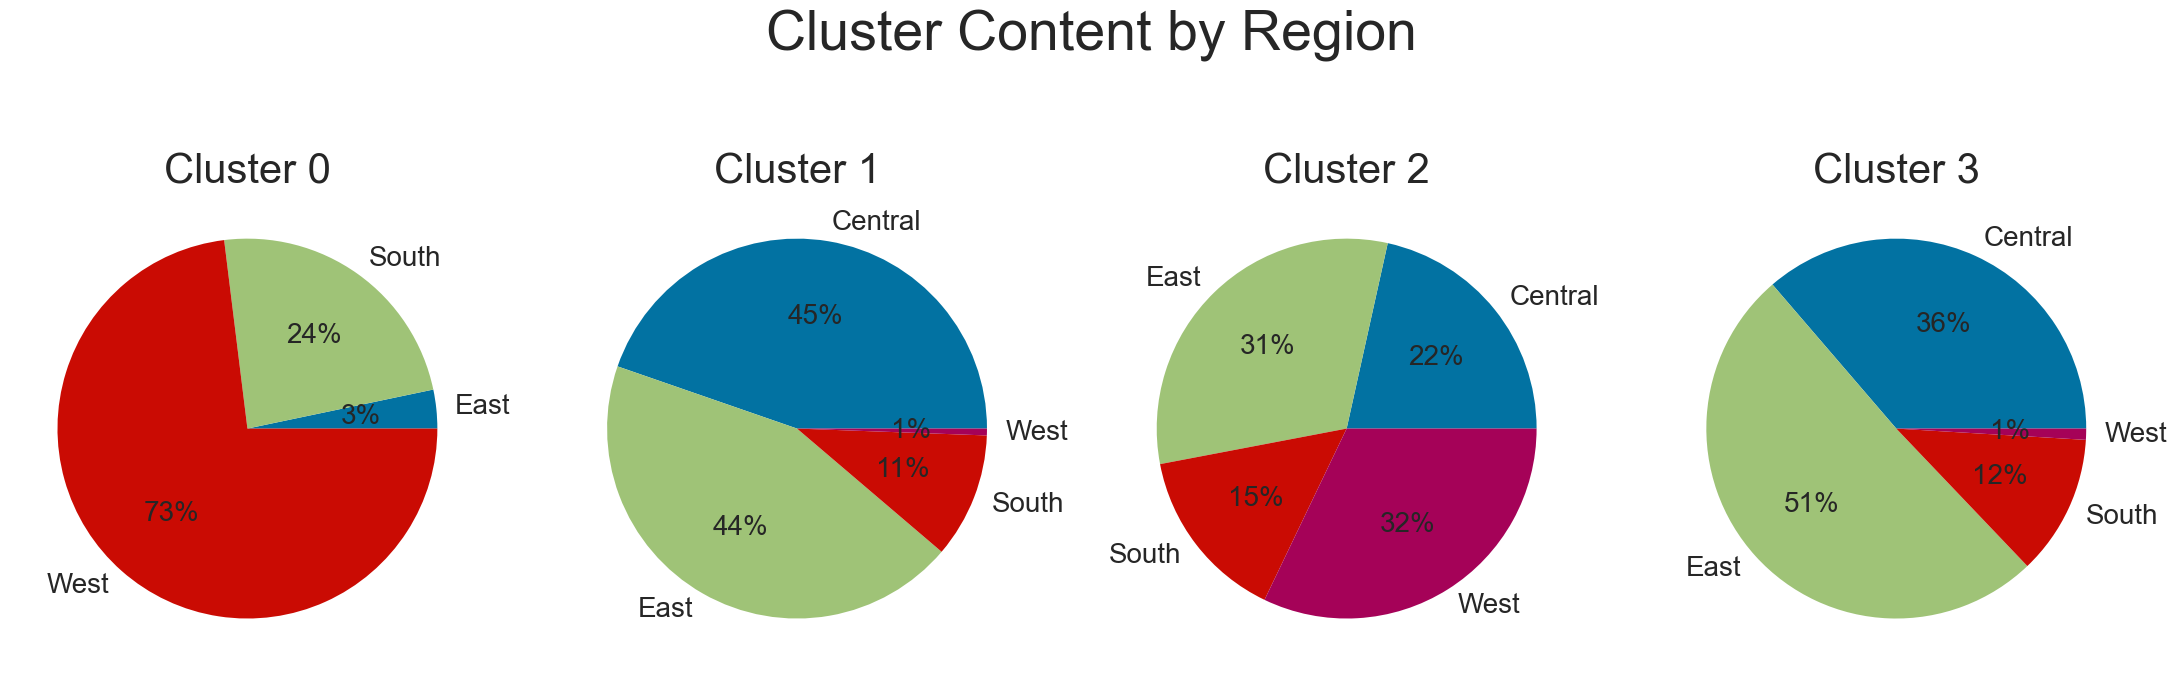

In [173]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(22,8))

data[data['Clusters 4'] == 0].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':20},ax=ax1)
data[data['Clusters 4'] == 1].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':20},ax=ax2)
data[data['Clusters 4'] == 2].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':20},ax=ax3)
data[data['Clusters 4'] == 3].groupby('Region').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':20},ax=ax4)

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)
ax4.set_title('Cluster 3',size=30)

fig.suptitle("Cluster Content by Region",fontsize=40)
plt.tight_layout()

plt.show()

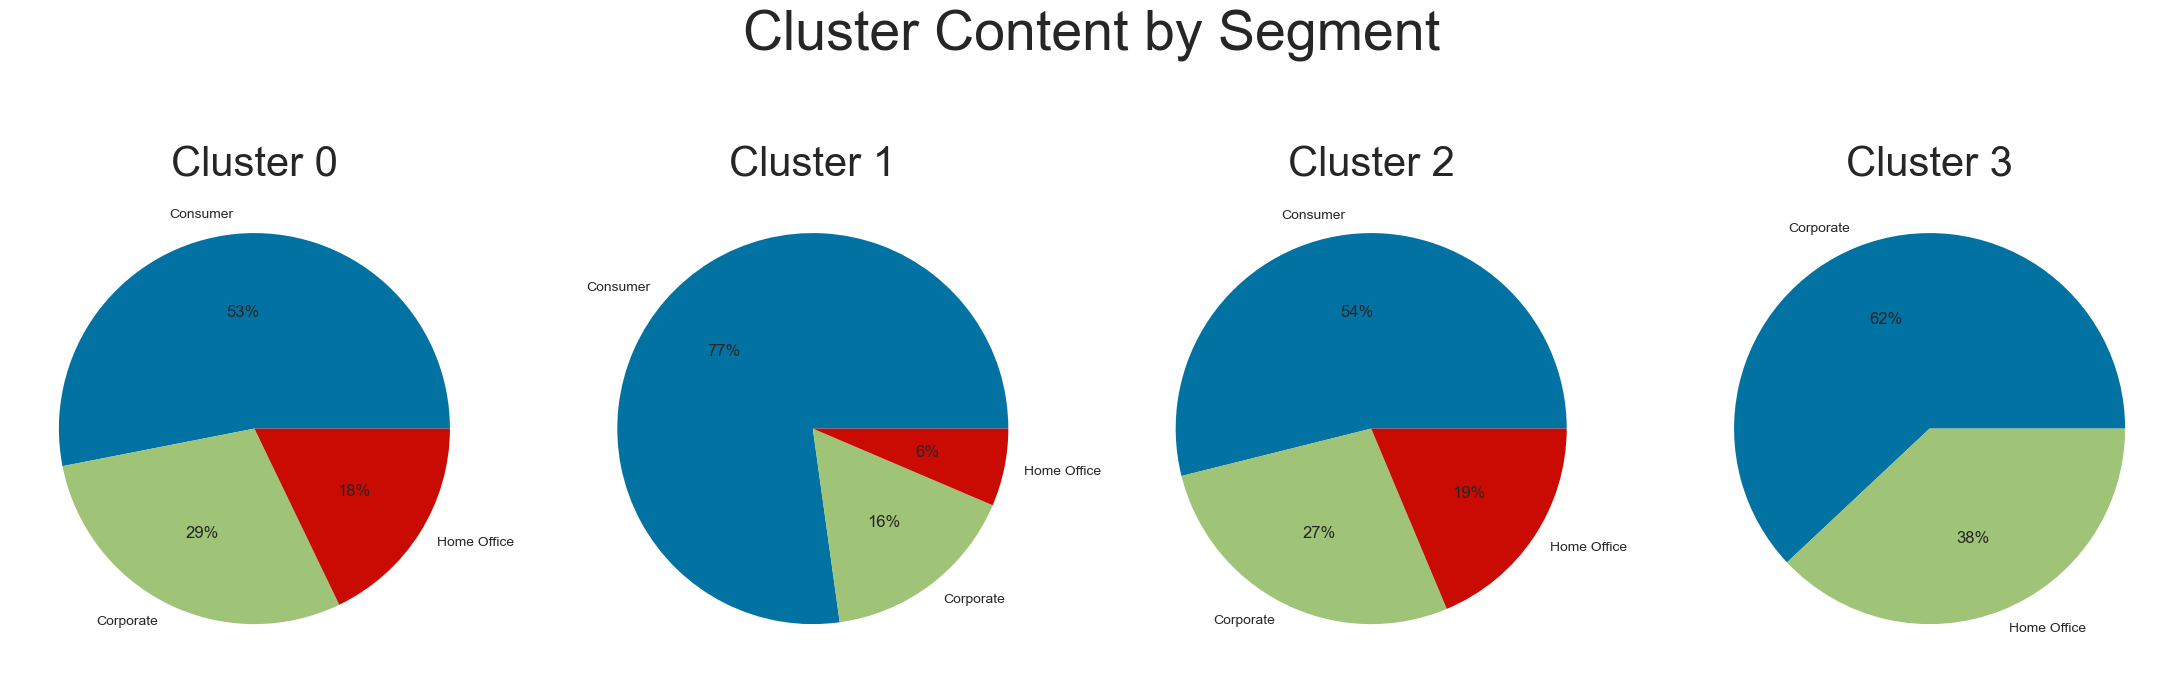

In [174]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(22,8))

data[data['Clusters 4'] == 0].groupby('Segment').size().plot(kind='pie',autopct=label_function,ax=ax1) #,textprops={'fontsize':16})

data[data['Clusters 4'] == 1].groupby('Segment').size().plot(kind='pie',autopct=label_function,ax=ax2) #,textprops={'fontsize':16})

data[data['Clusters 4'] == 2].groupby('Segment').size().plot(kind='pie',autopct=label_function,ax=ax3) #,textprops={'fontsize':16})

data[data['Clusters 4'] == 3].groupby('Segment').size().plot(kind='pie',autopct=label_function,ax=ax4) #,textprops={'fontsize':16})

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)
ax4.set_title('Cluster 3',size=30)

fig.suptitle("Cluster Content by Segment",fontsize=40)
plt.tight_layout()

plt.show()

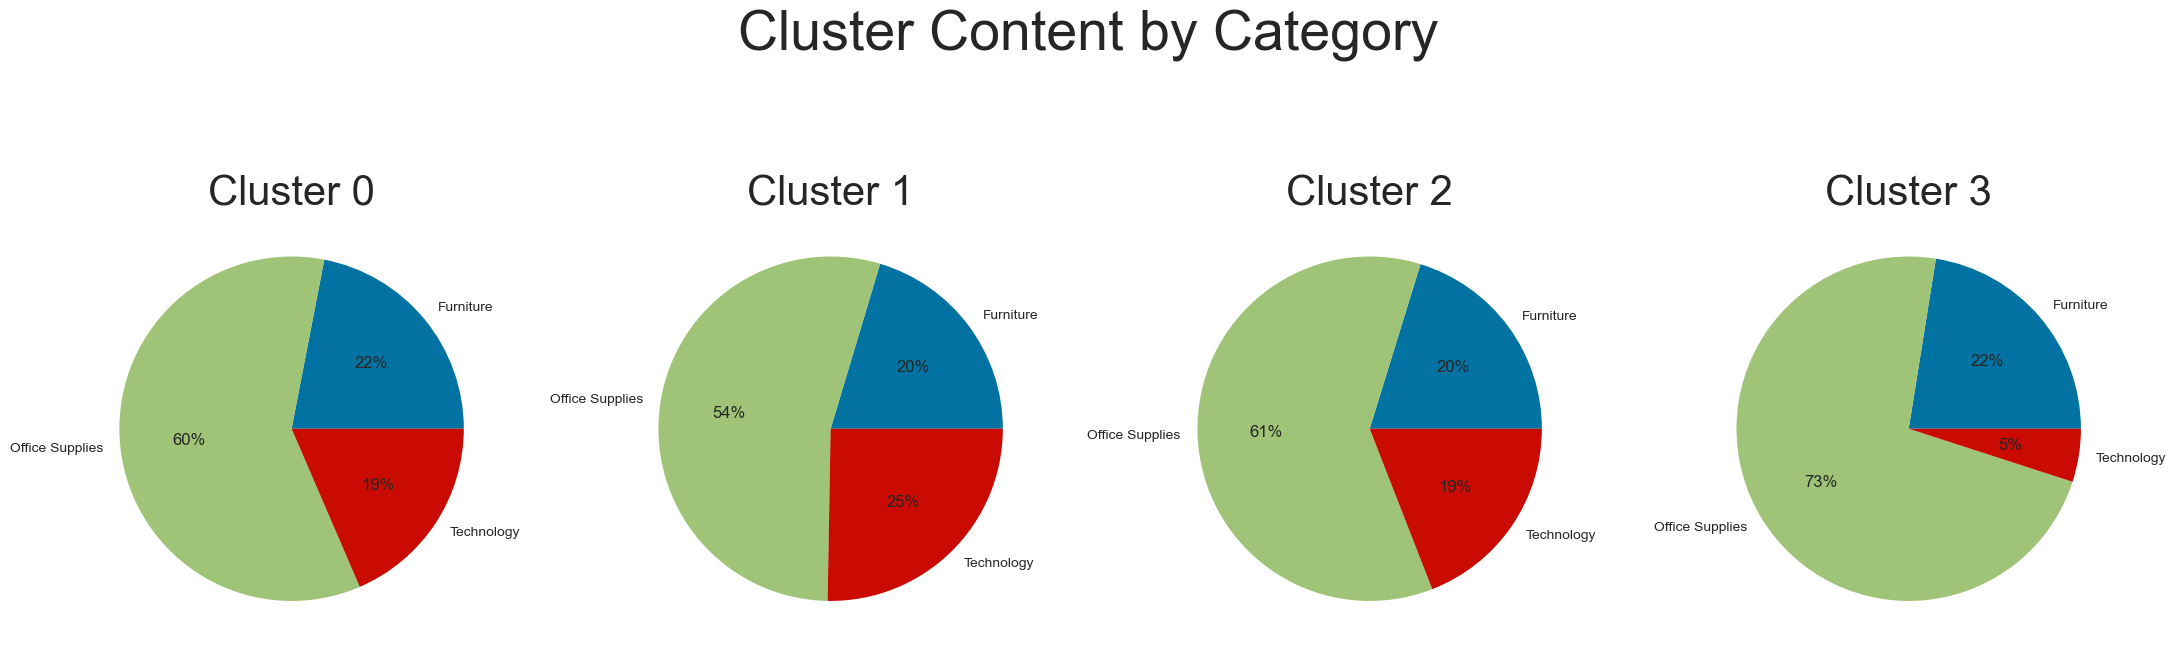

In [175]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(22,8))

data[data['Clusters 4'] == 0].groupby('Category').size().plot(kind='pie',autopct=label_function,ax=ax1) #,textprops={'fontsize':14})

data[data['Clusters 4'] == 1].groupby('Category').size().plot(kind='pie',autopct=label_function,ax=ax2) #,textprops={'fontsize':14})

data[data['Clusters 4'] == 2].groupby('Category').size().plot(kind='pie',autopct=label_function,ax=ax3) #,textprops={'fontsize':14})

data[data['Clusters 4'] == 3].groupby('Category').size().plot(kind='pie',autopct=label_function,ax=ax4) #,textprops={'fontsize':14})

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)
ax4.set_title('Cluster 3',size=30)

fig.suptitle("Cluster Content by Category",fontsize=40)
plt.tight_layout()

plt.show()

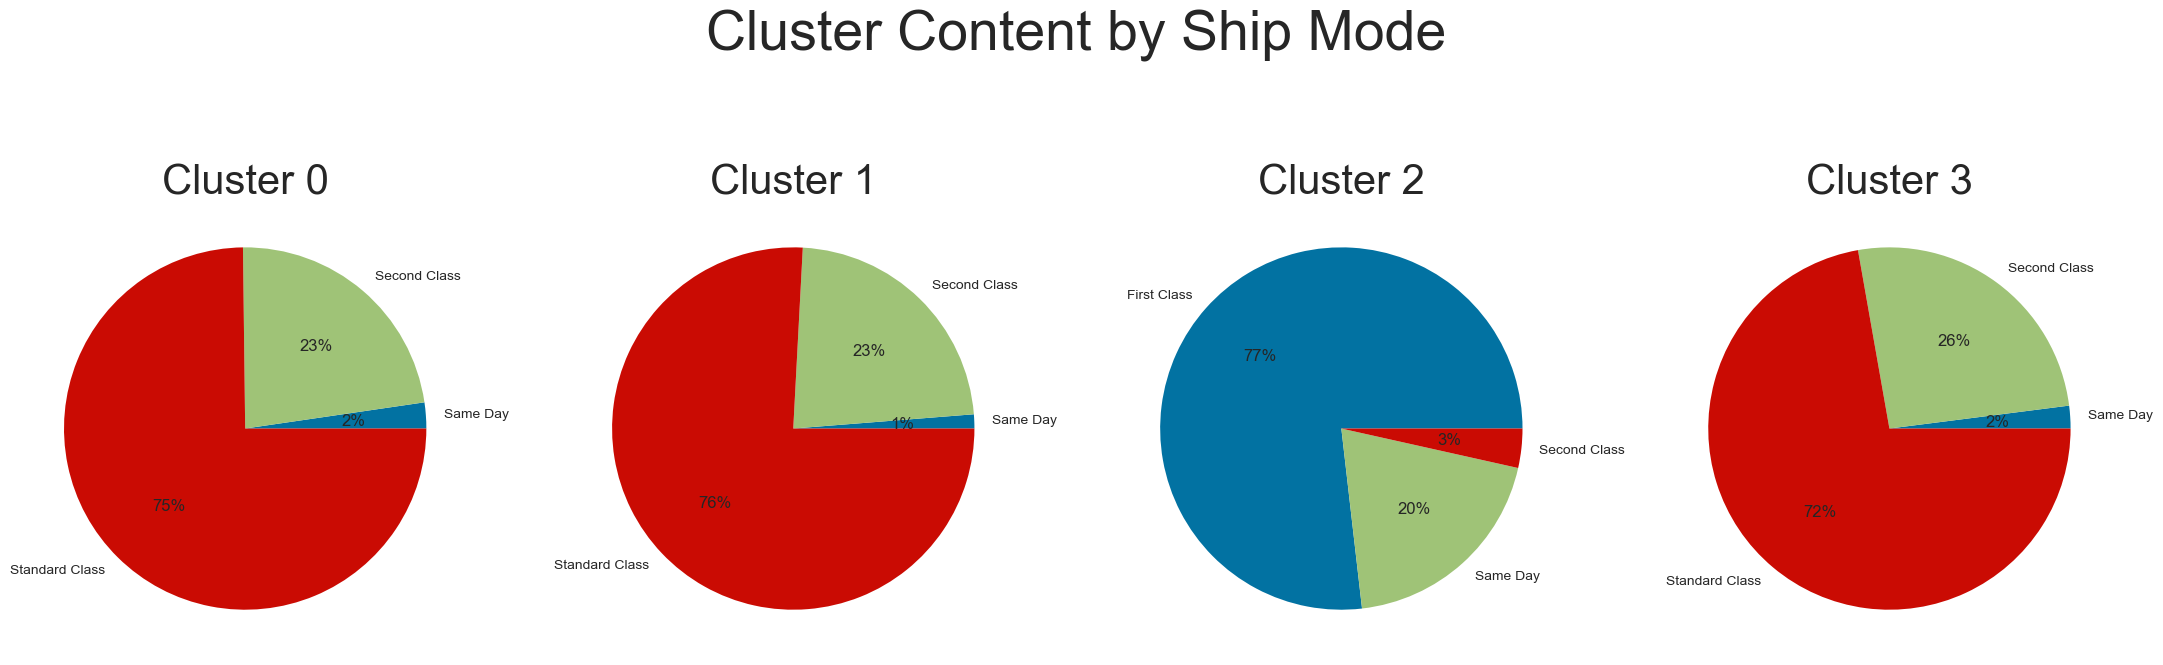

In [176]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(22,8))

data[data['Clusters 4'] == 0].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,ax=ax1) #,textprops={'fontsize':16})

data[data['Clusters 4'] == 1].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,ax=ax2) #,textprops={'fontsize':16})

data[data['Clusters 4'] == 2].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,ax=ax3) #,textprops={'fontsize':16})

data[data['Clusters 4'] == 3].groupby('Ship Mode').size().plot(kind='pie',autopct=label_function,ax=ax4) #,textprops={'fontsize':16})

ax1.set_title('Cluster 0',size=30)
ax2.set_title('Cluster 1',size=30)
ax3.set_title('Cluster 2',size=30)
ax4.set_title('Cluster 3',size=30)

fig.suptitle("Cluster Content by Ship Mode",fontsize=40)
plt.tight_layout()

plt.show()

In this second case it is more difficult to develop customer personas. This is why I conclude that the more appropriate segmentation of the customers is that based on three clusters.

<a id="6"></a>
## <b><div style='padding:15px;background-color:black;color:white;border-radius:40px;font-size:110%;text-align: left'>6. Final Insights</div></b>

## 1. Sales to Profit Ratio

The sales and profit grew almost constantly in the years 2014-2017. The sales to profit ratio increased between 2014 and 2015, but then it stayed quite stable. Therefore, in order to further increase the profit, the company should either increase its sales or the profit ratio, by cutting the unnecessary expenses.

## 2. Shipping

There are four shipping classes: Same Day, First Class, Second Class and Standard Class.
<br>The delivery distribution of the Same Day class has a high peak and also a much smaller one. The delivery distributions of the other 3 shipping classes are multi-peaked and they are also highly spread in time. Their delivery date is quite 'random'.

It would be very inportant to standardize the shipping deliveries in order to provide a better service.

## 3. Key Areas

California is the top selling state (20% of the sales), then New York (11%) and Texas (10%). New York and Los Angeles are the top selling cities. Moreover, more than half of the sales is generated in the top-20 cities of the USA.
<br> There are also cities (like Philadelphia and Houston) that constantly generate negative profits.

Something must be done. The company should either focus on specific areas of the country (the most profitable ones) or it should invest in order to improve its performance in the least profitable areas.

## 4. More and Less Profitable Product Categories

Technology and office supplies are quite profitable categories; furniture is much less. Moreover, there are sub-categories of products (like the tables) that generate negative profits.

Something must be done. Maybe some products should be either removed from the catalogue, or the discounts on them should be highly cut.

## 5. Customer Personas

The customers can be grouped in three spending (or better profit) categories. The highest value customers must be kept at any cost, while something should be done to make the lowest value customers rise to more profitable classes.

In [177]:
table_data = [['Cluster Number','Customer Persona','Profit','Discount','Ship Mode','Region','Customer value'],
             ['Cluster 0','Greedy Albert','Low','High','Standard Class','Everywhere in the US','**'],
             ['Cluster 1','Shopaholic Carlie','High','Low','Standard Class','West','****'],
             ['Cluster 2','Average Billy','Medium','Medium','First Class','Everywhere in the US','***']]

# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data,height_constant=30)
figure.layout.width=1000

iplot(figure)